In [ ]:
pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 4.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import statsmodels
from statsmodels.tsa.seasonal import STL

In [ ]:
df = pd.read_csv('/content/ts_kwh_dataframe.csv')
df = df.drop('Unnamed: 0', axis = 1)
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.set_index('Fecha')
df['Year'] = df.index.year
df['Month'] = df.index.month

In [ ]:
variables = ['kW/h price mean', 
       'Disponibilidad_HIDRAULICA', 'Disponibilidad_TERMICA',
       'Disponibilidad_SOLAR', 'Aportes Caudal m3/s', 'Aportes Energía gWh',
       'Volumen Útil Diario Mm3', 'Volumen Mm3',
       'Volumen Útil Diario Energía gWh', 'Volumen Energía gWh',
       'Vertimientos Volumen miles m3', 'Vertimiento Energía gWh']

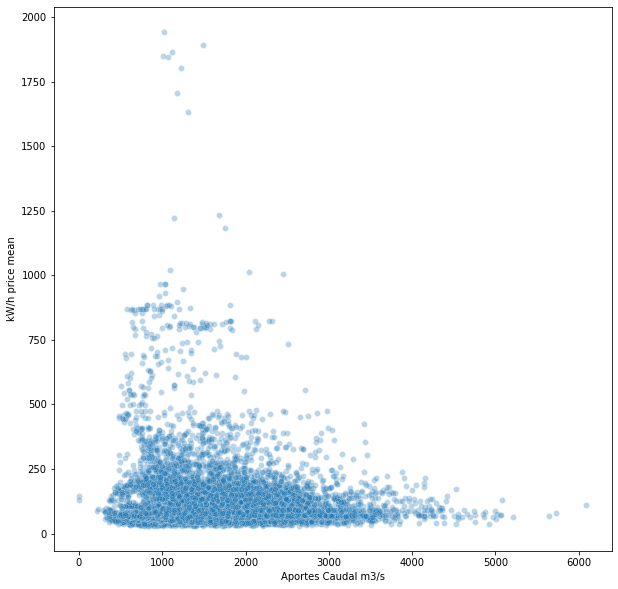

In [ ]:
# Scatterplots:
# Precio vs Aportes Caudal:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Aportes Caudal m3/s', alpha=0.3)

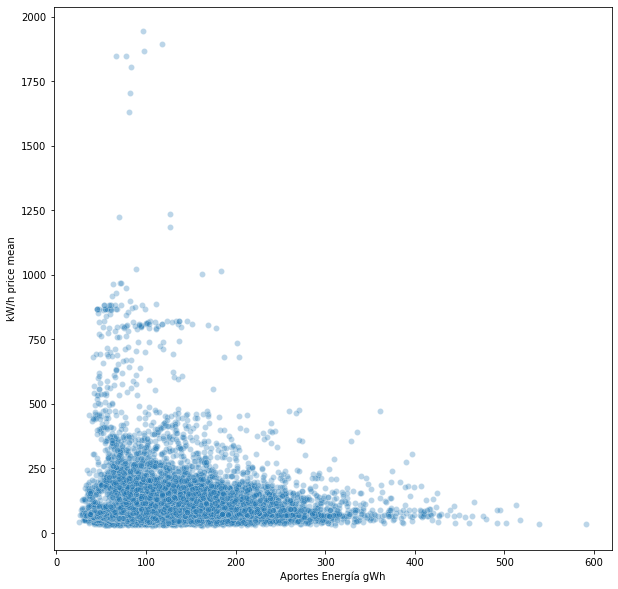

In [ ]:
# Scatterplots:
# Precio vs Aportes Energia:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Aportes Energía gWh', alpha=0.3)

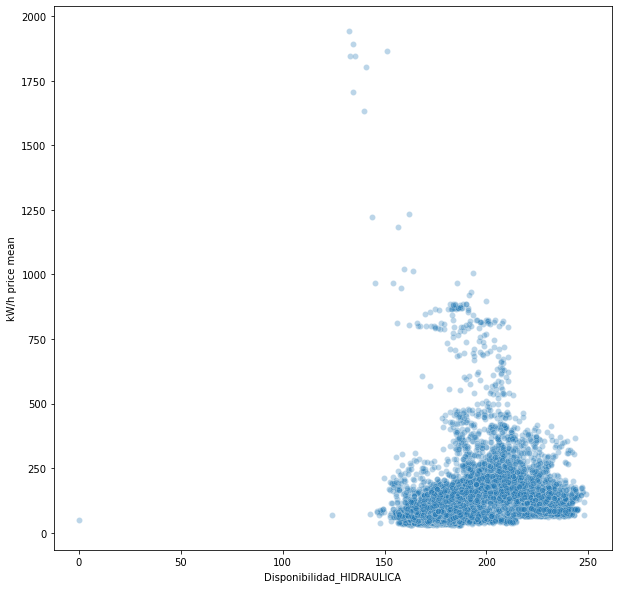

In [ ]:
# Scatterplots:
# Precio vs Disponibilidad_HIDRAULICA:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Disponibilidad_HIDRAULICA', alpha=0.3)

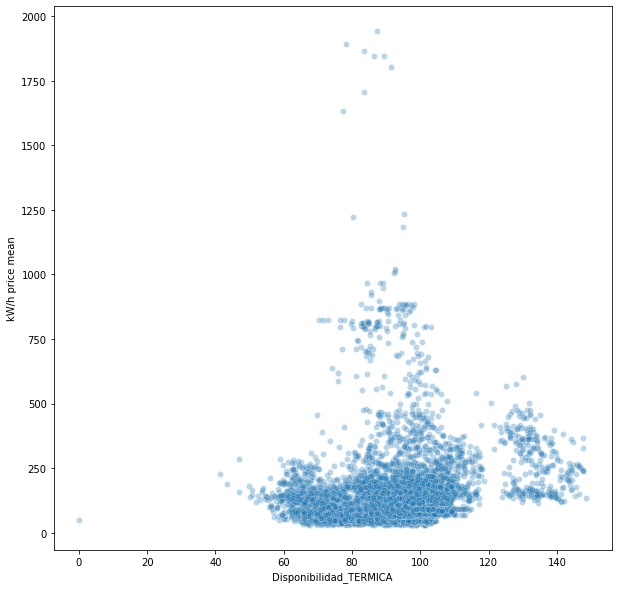

In [ ]:
# Scatterplots:
# Precio vs Disponibilidad_TERMICA:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Disponibilidad_TERMICA', alpha=0.3)

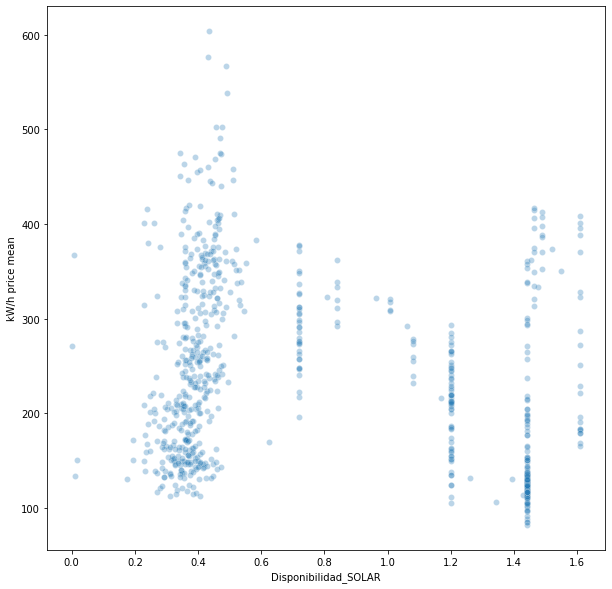

In [ ]:
# Scatterplots:
# Precio vs Disponibilidad_SOLAR:
plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, y='kW/h price mean', x = 'Disponibilidad_SOLAR', alpha=0.3)

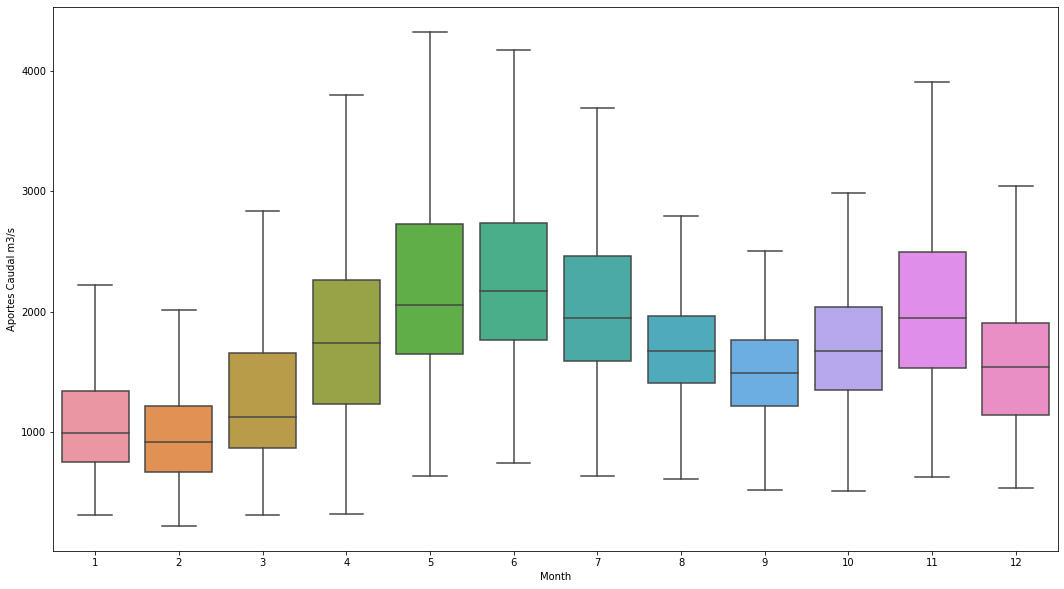

In [ ]:
# Boxplots: 
# Aportes m3/s mensual:
plt.subplots(figsize=(18,10))
sns.boxplot(data=df, x='Month', y='Aportes Caudal m3/s', showfliers=False)

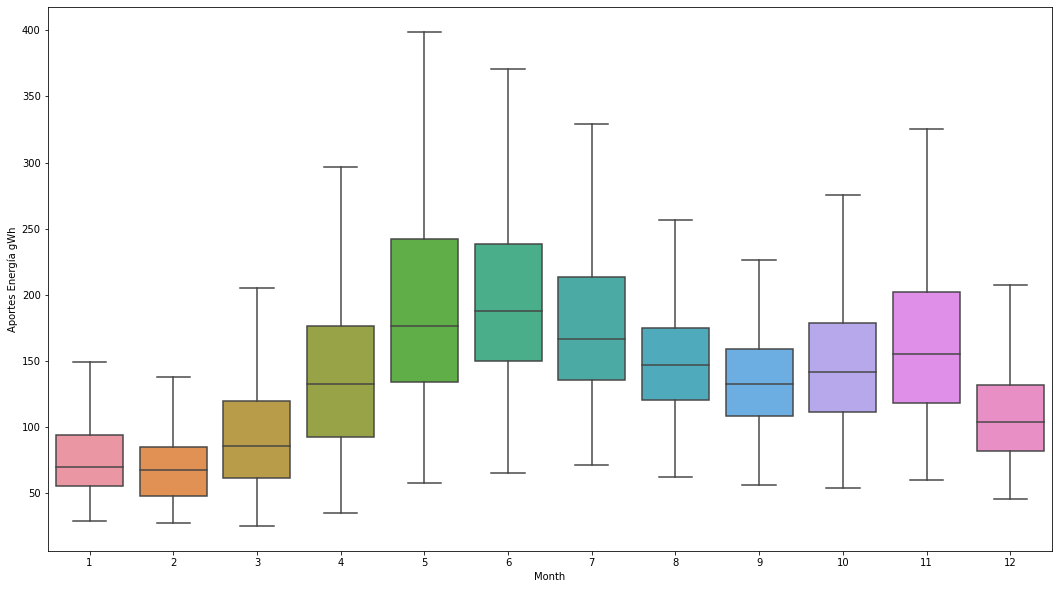

In [ ]:
# Boxplots:
# Aportes Energía gWh mensual:
plt.subplots(figsize=(18,10))
sns.boxplot(data=df, x='Month', y='Aportes Energía gWh', showfliers=False)

#EDA:

## Correlations:

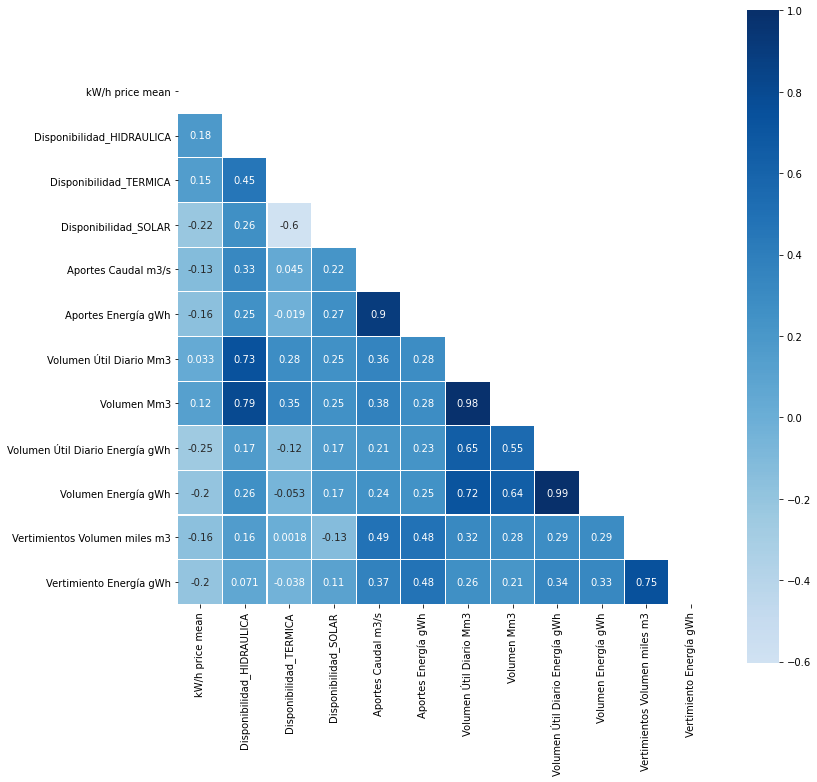

In [ ]:
corr = df[variables].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0, square=True, linewidths=.1, annot = True)

## Time Series:

### Raw time series:

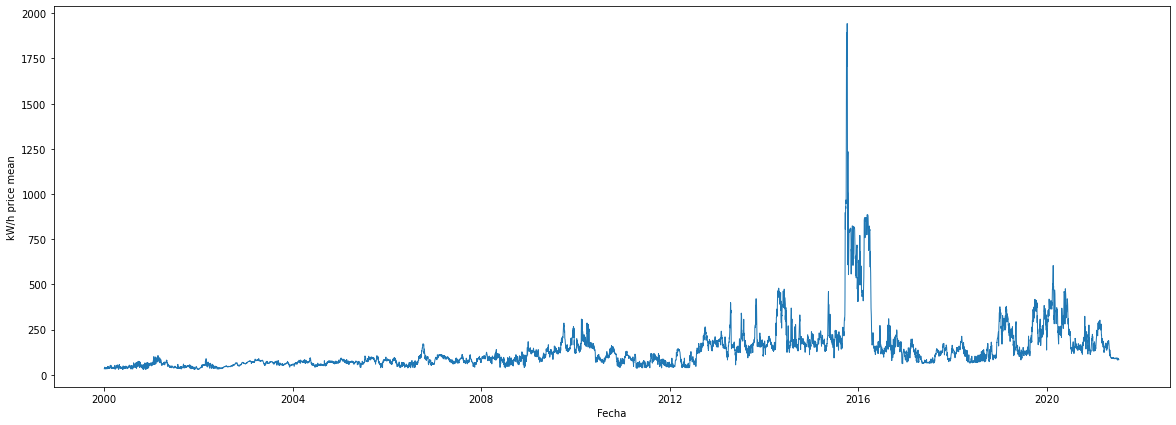

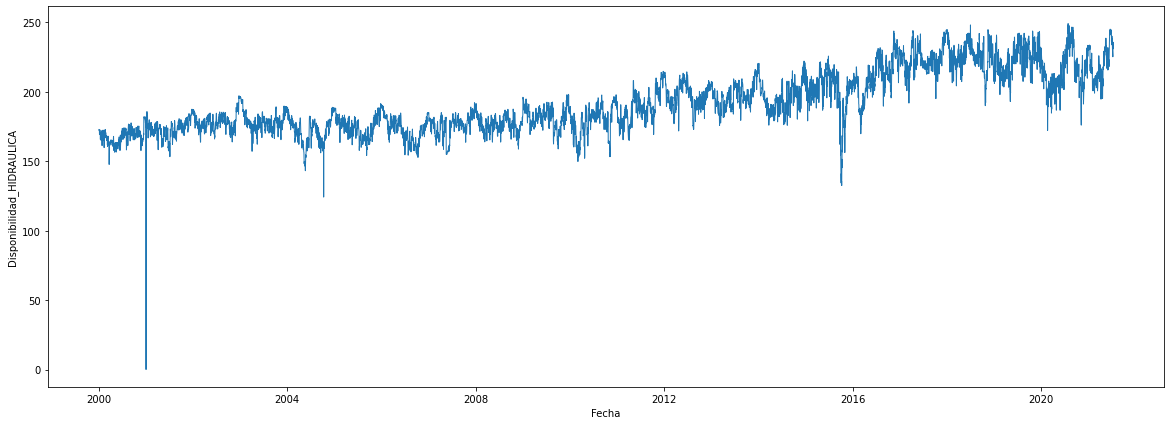

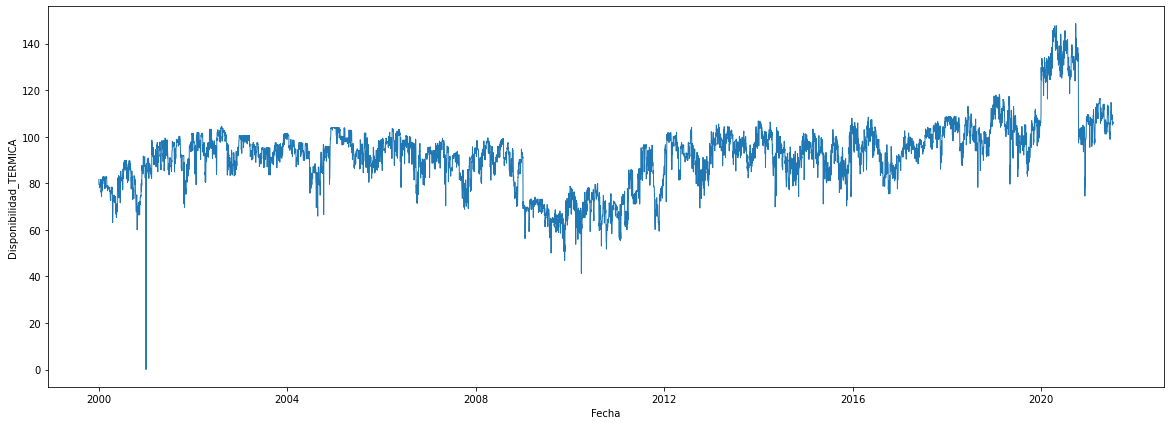

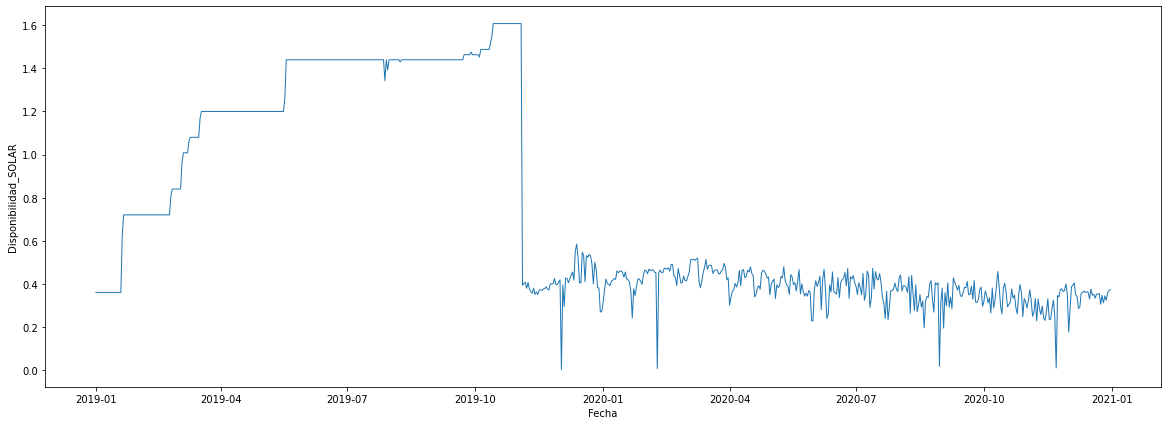

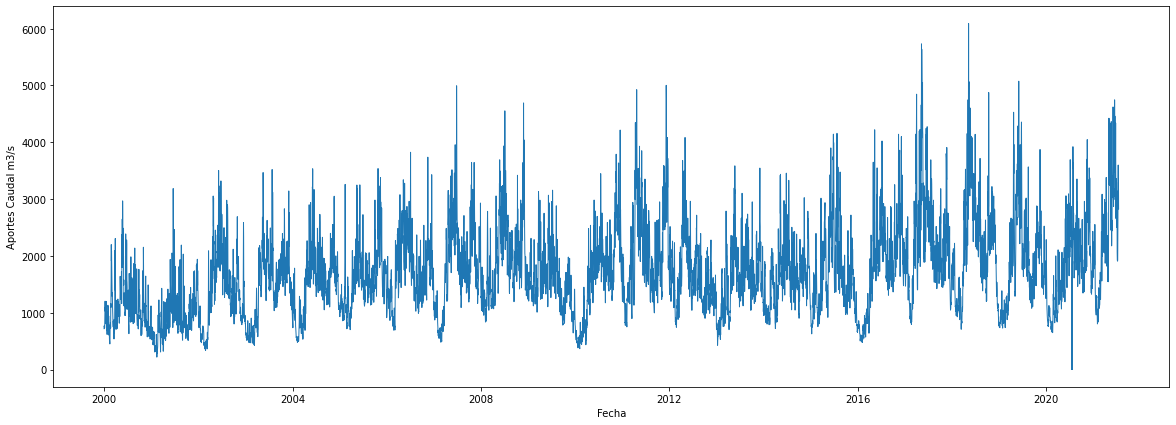

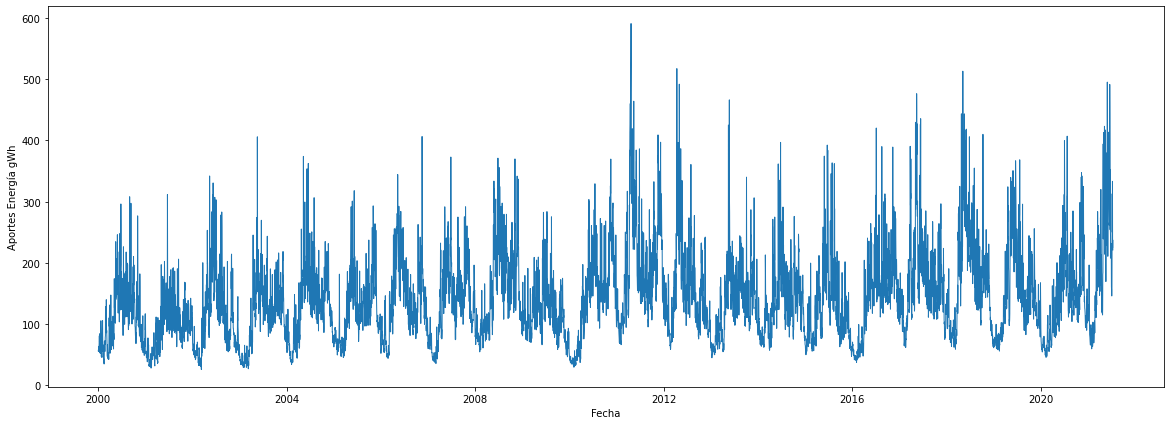

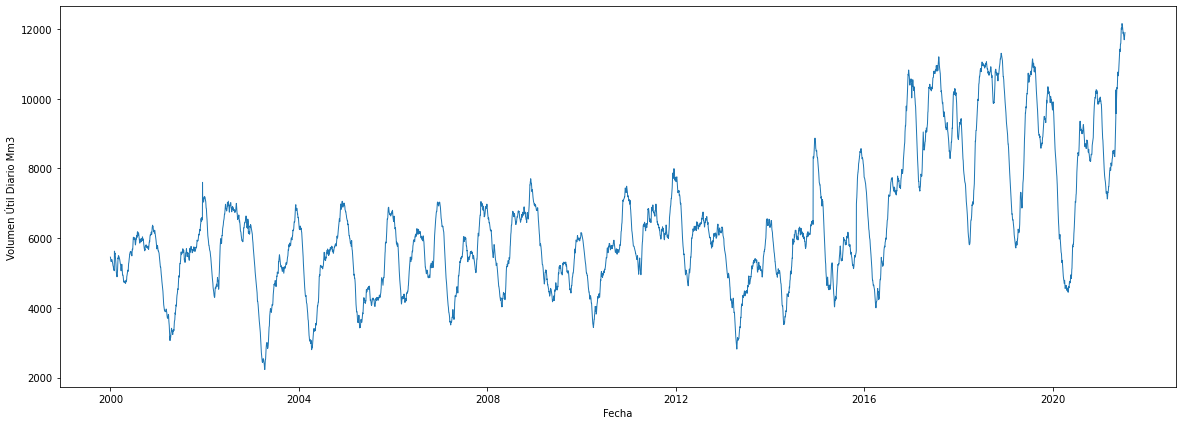

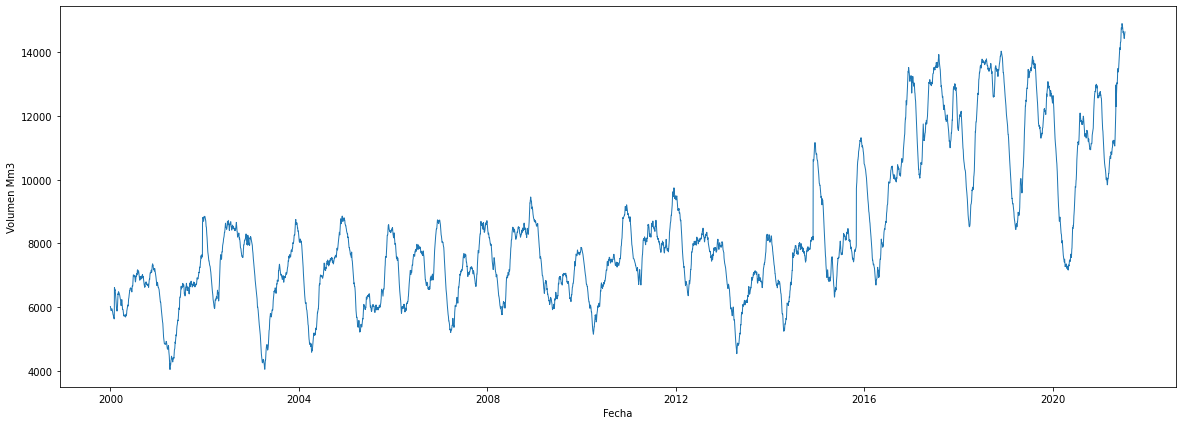

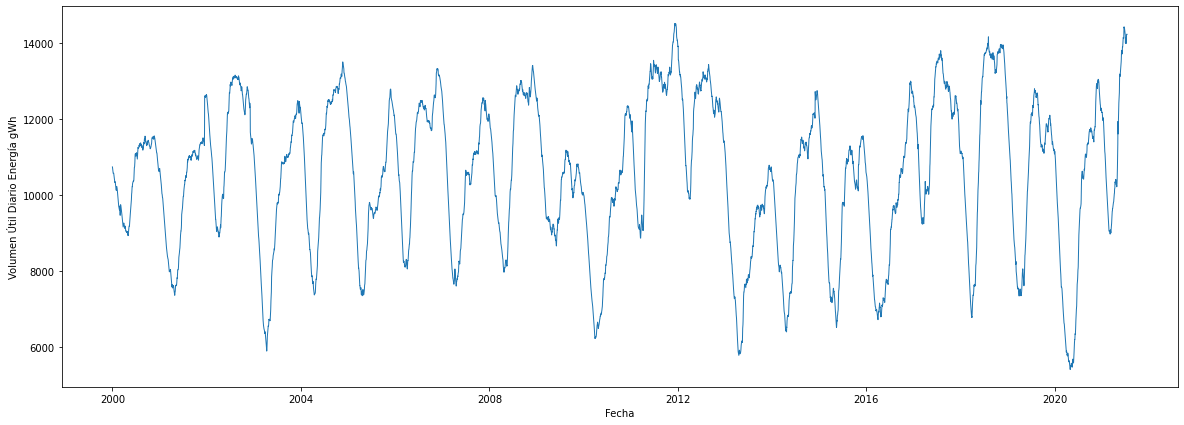

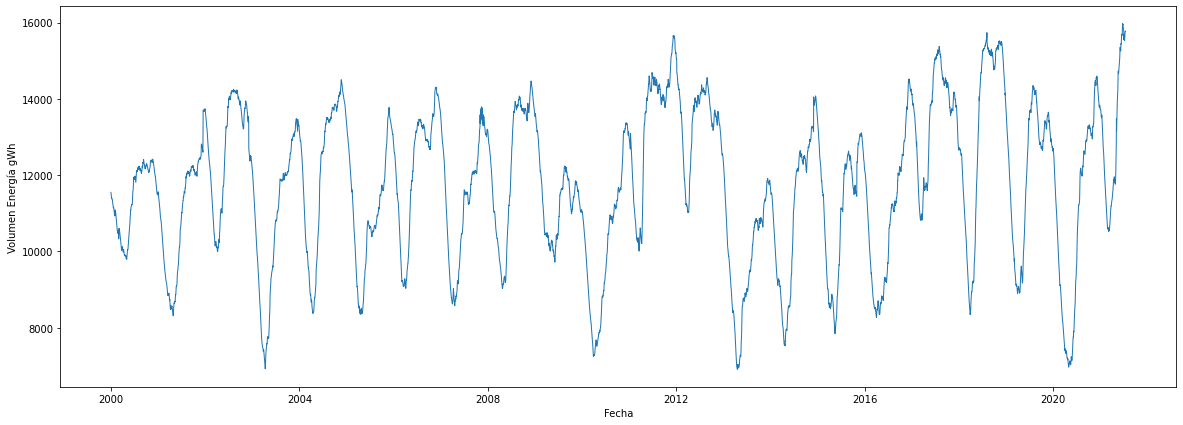

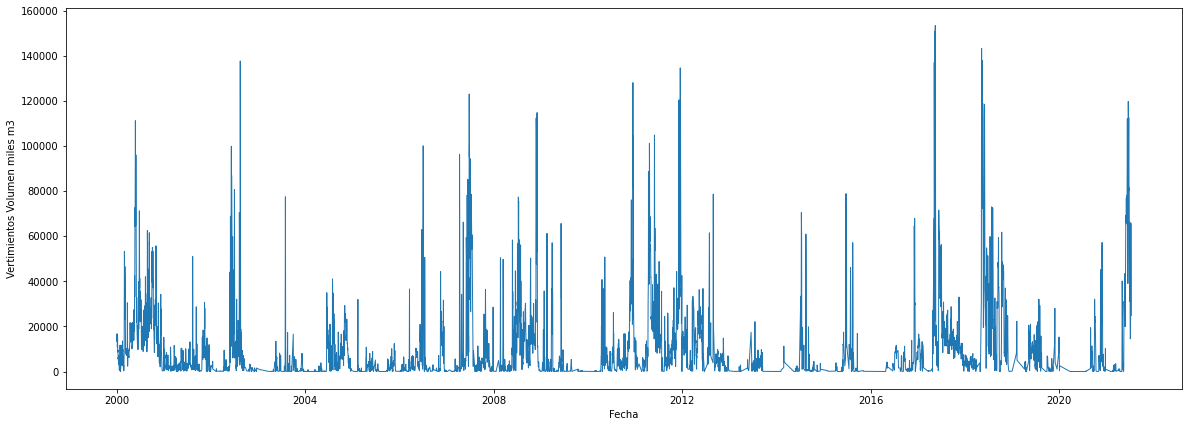

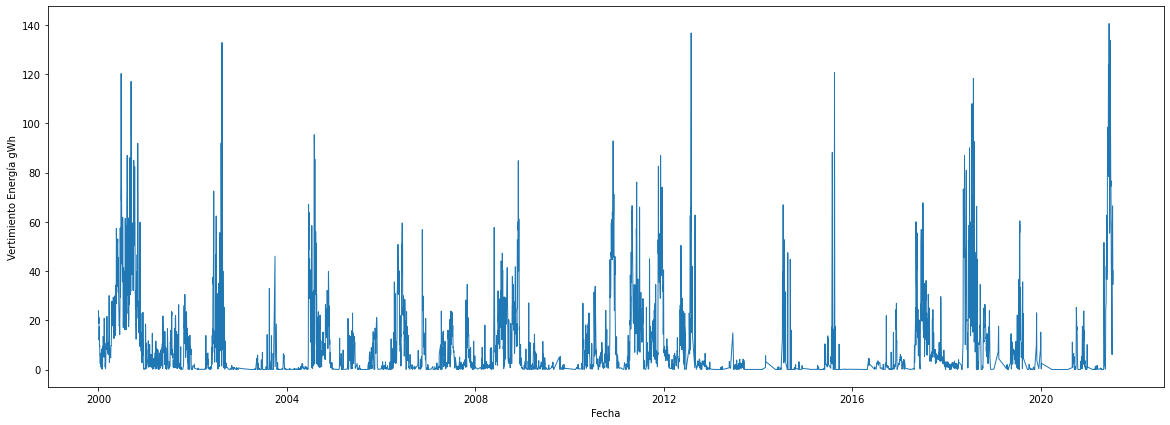

In [ ]:
for i in variables:
  fig, ax = plt.subplots(figsize=(20,7))
  sns.lineplot(data = df, y=i, x = 'Fecha', linewidth=1)
  plt.show()

### Jointplots:

Yearly:

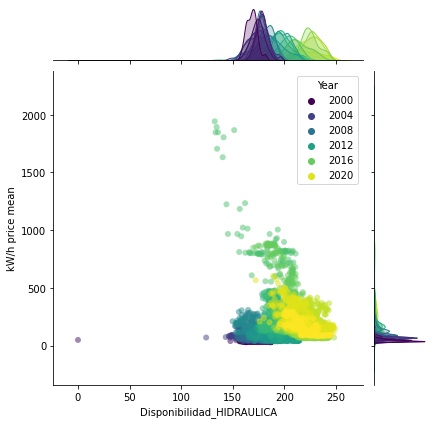

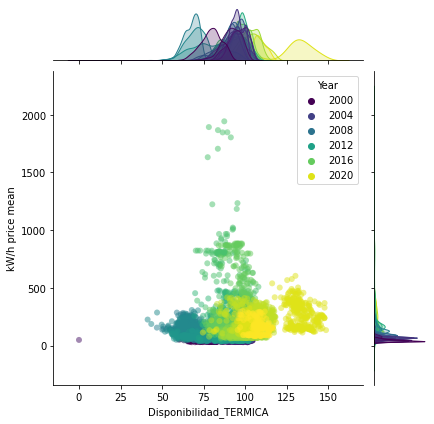

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

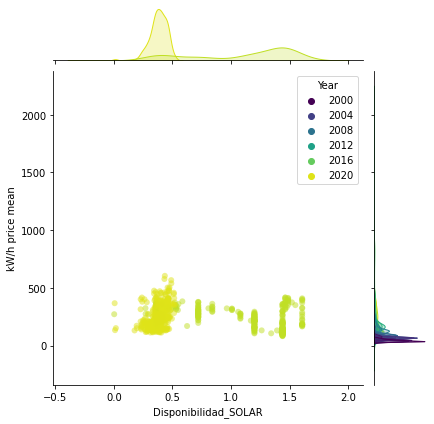

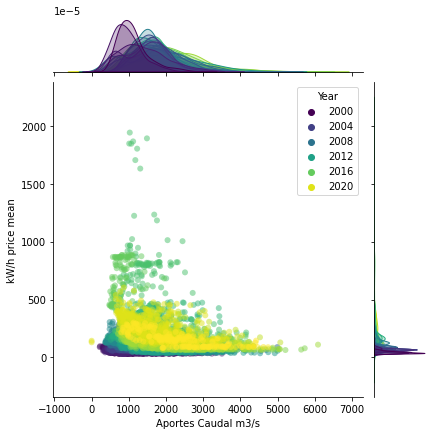

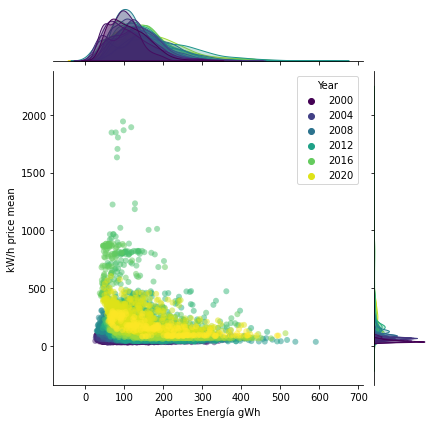

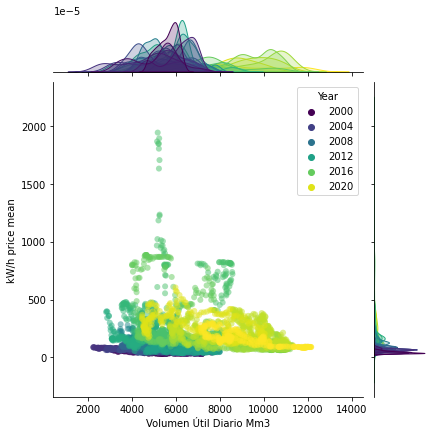

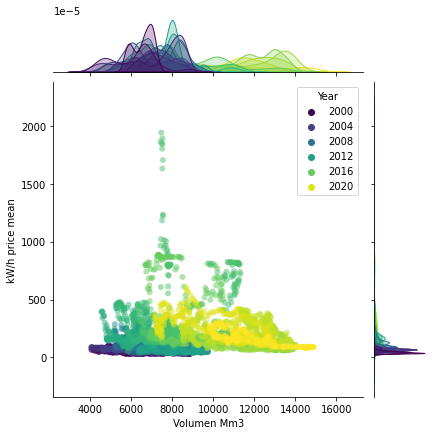

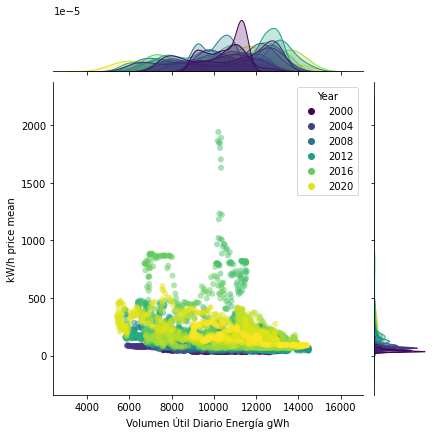

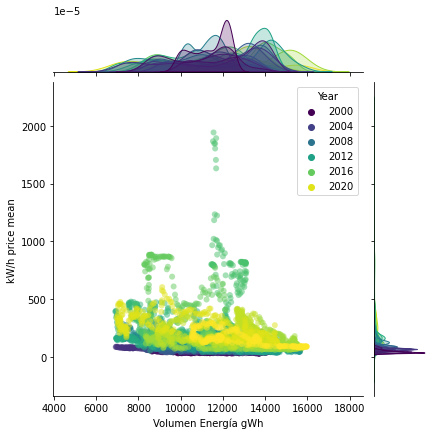

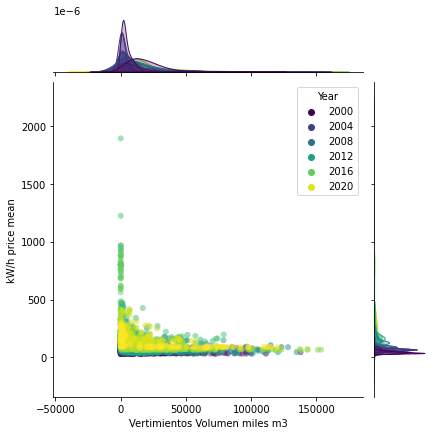

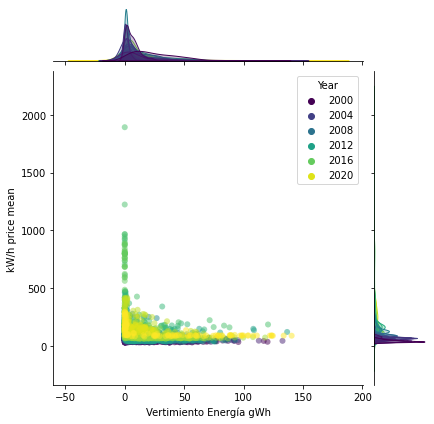

In [ ]:
for i in variables[1:]:
  fig = sns.jointplot(data = df, y='kW/h price mean', x = i, hue = 'Year', alpha=.5, linewidth=0, palette = 'viridis')
  plt.show(fig)

Monthly:

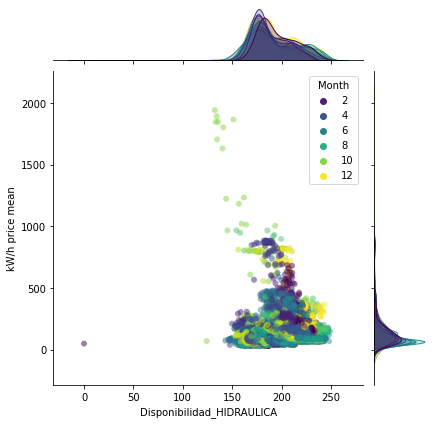

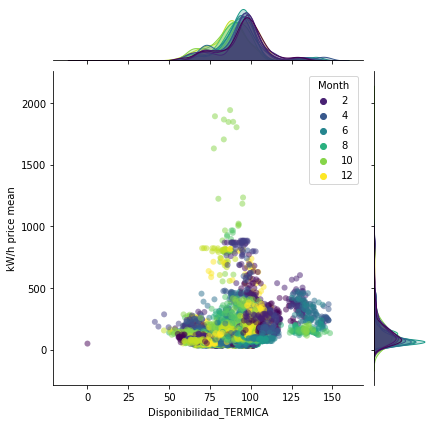

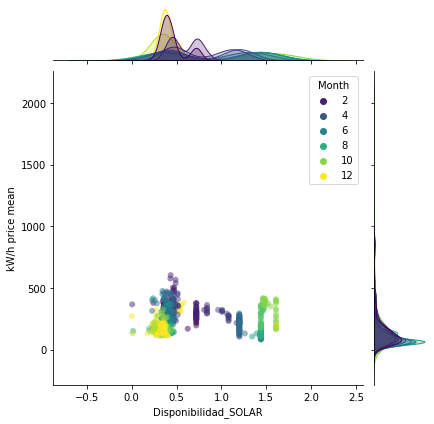

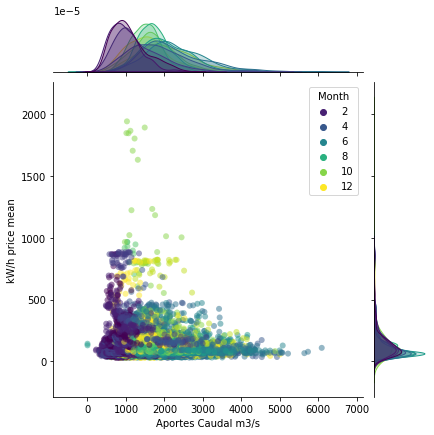

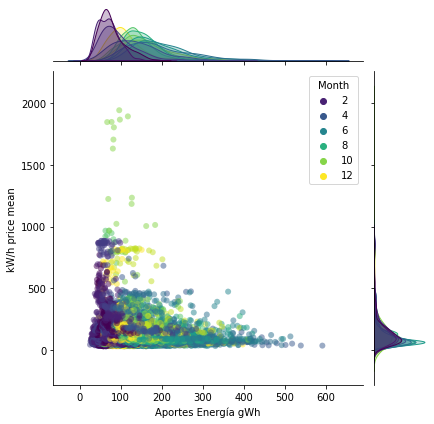

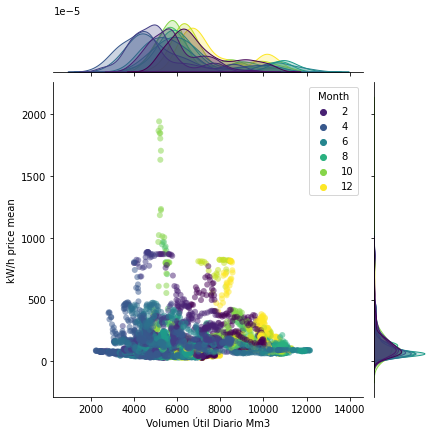

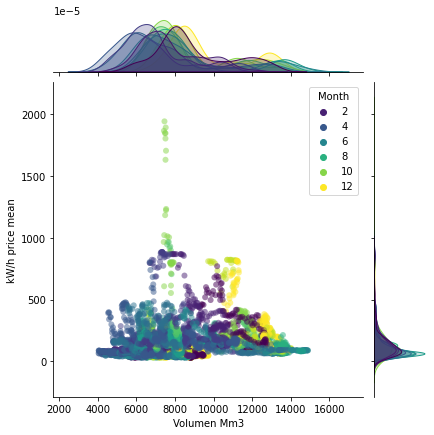

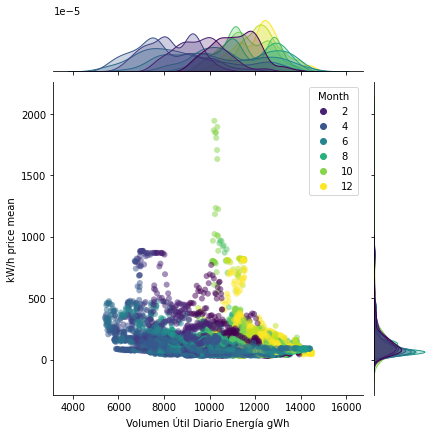

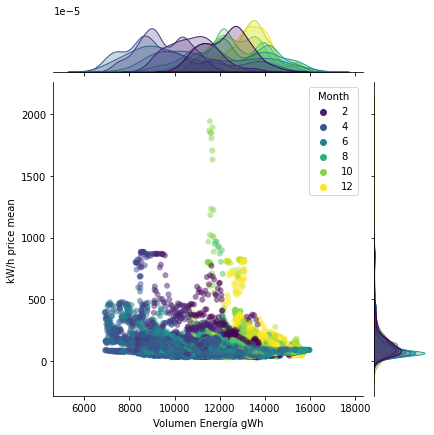

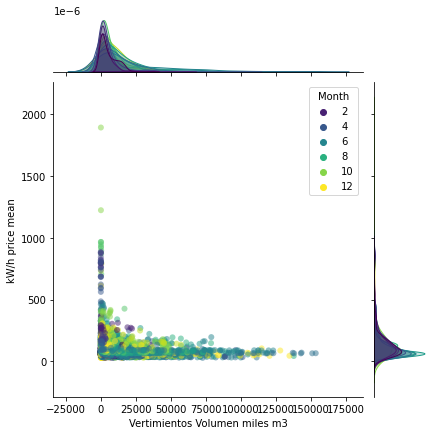

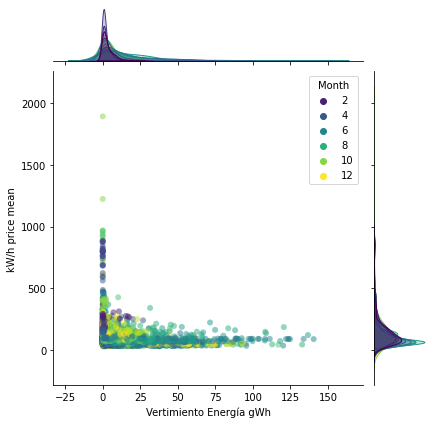

In [ ]:
for i in variables[1:]:
  fig = sns.jointplot(data = df, y='kW/h price mean', x = i, hue = 'Month', alpha=.5, linewidth=0, palette = 'viridis')
  plt.show(fig)

### Stationarity:

Yearly:

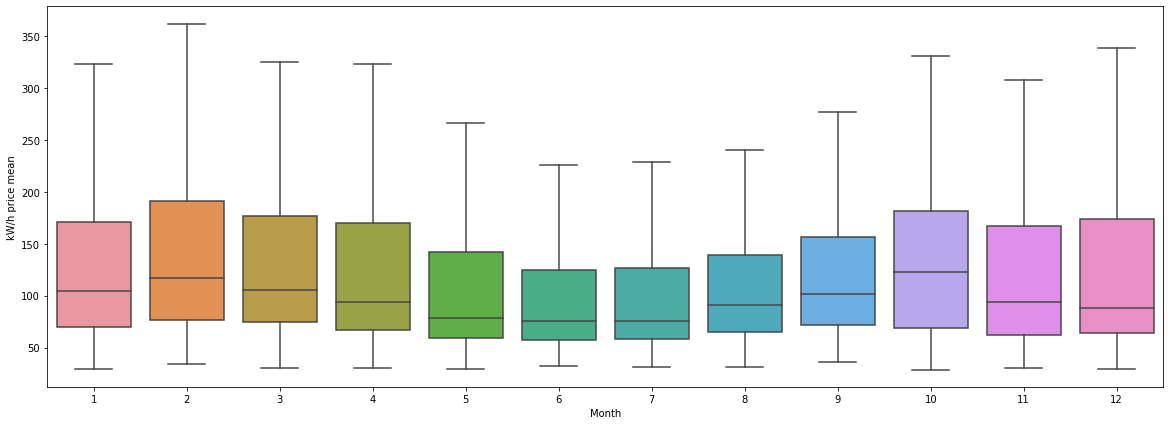

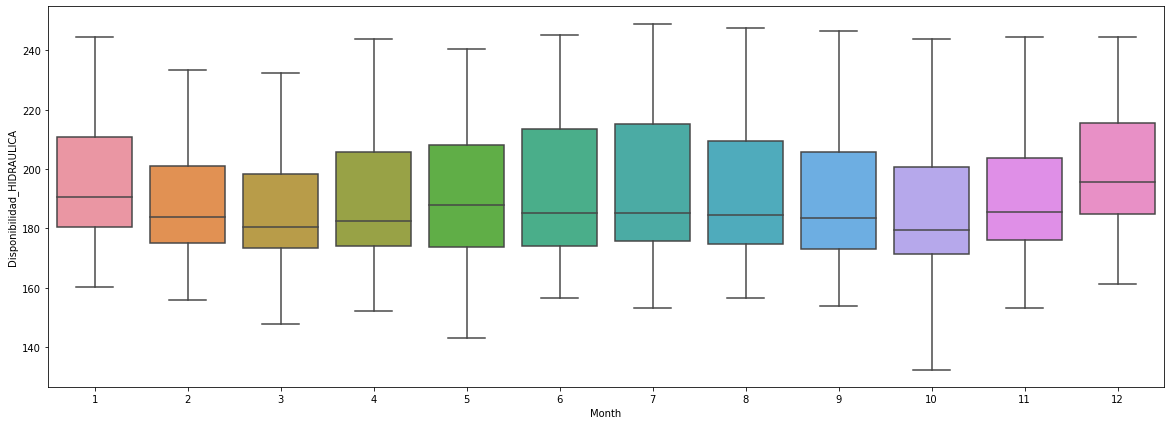

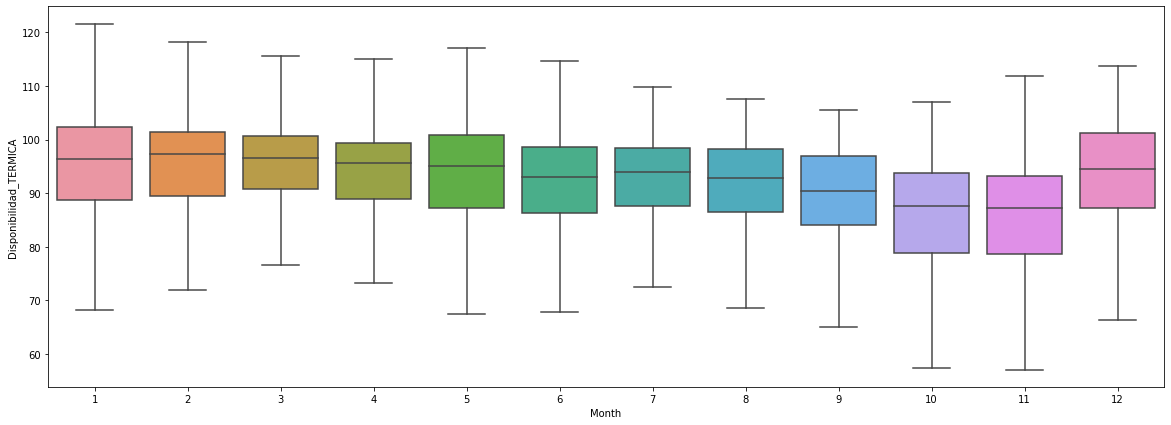

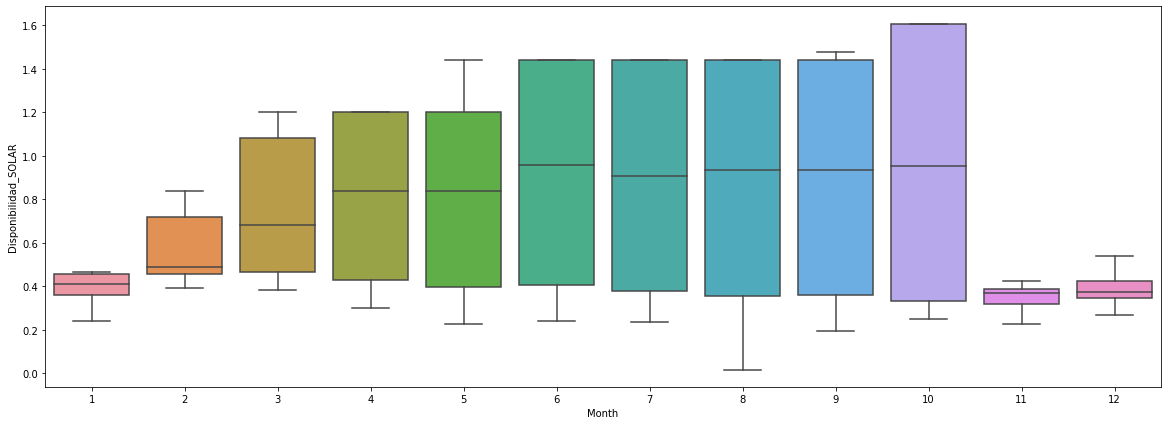

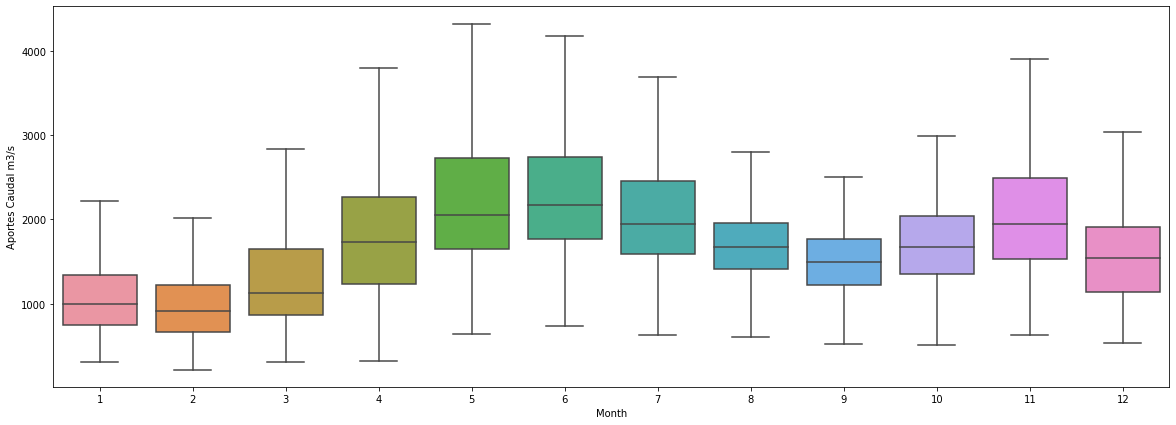

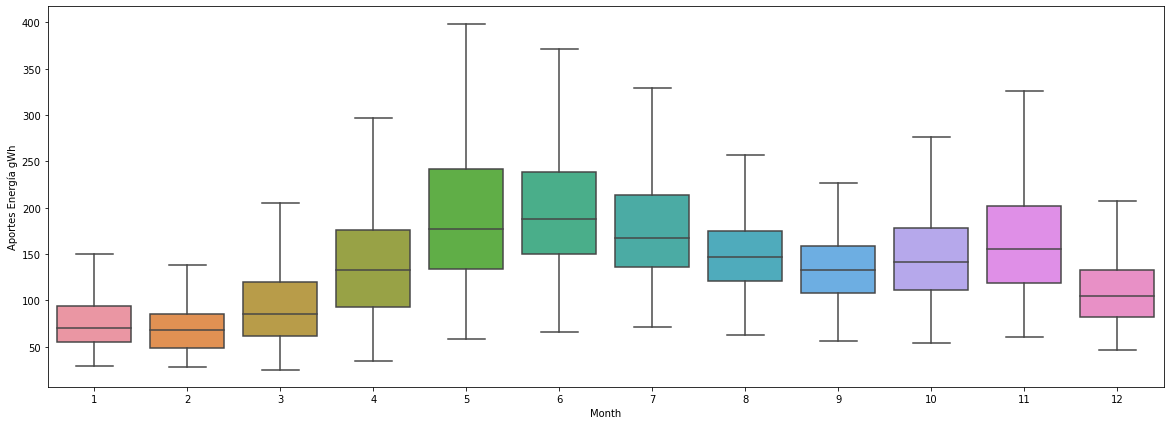

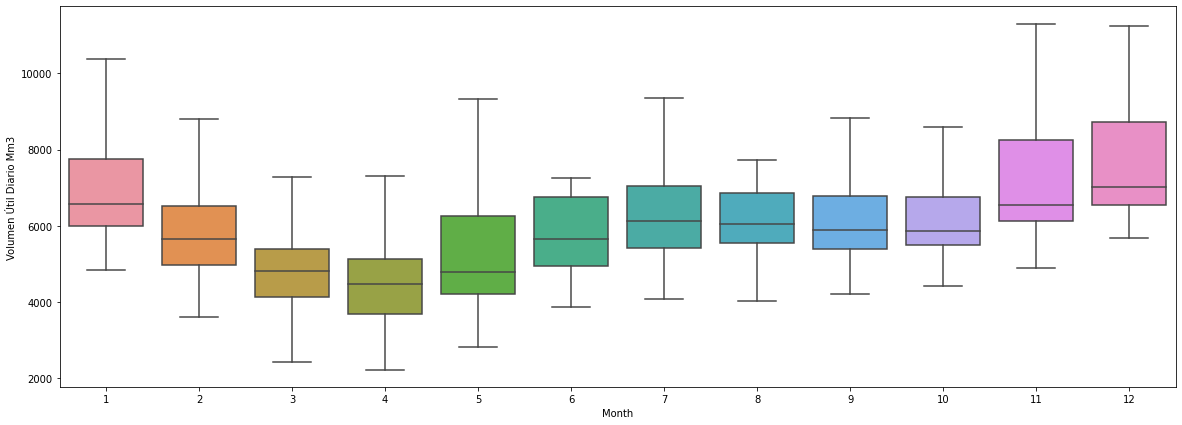

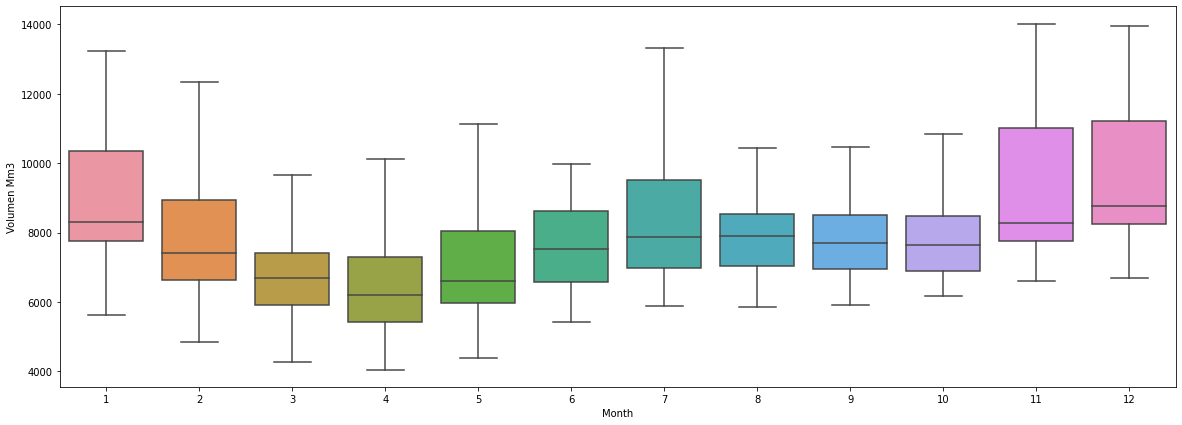

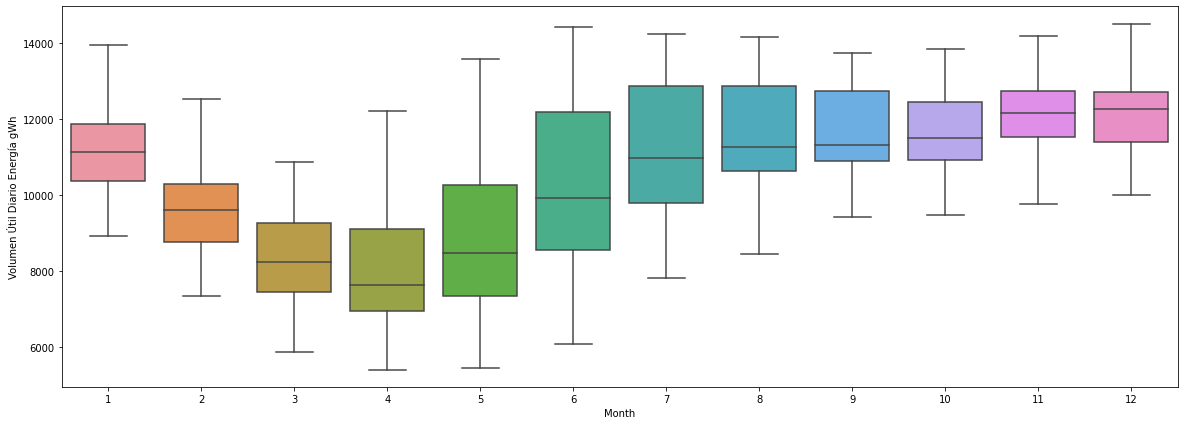

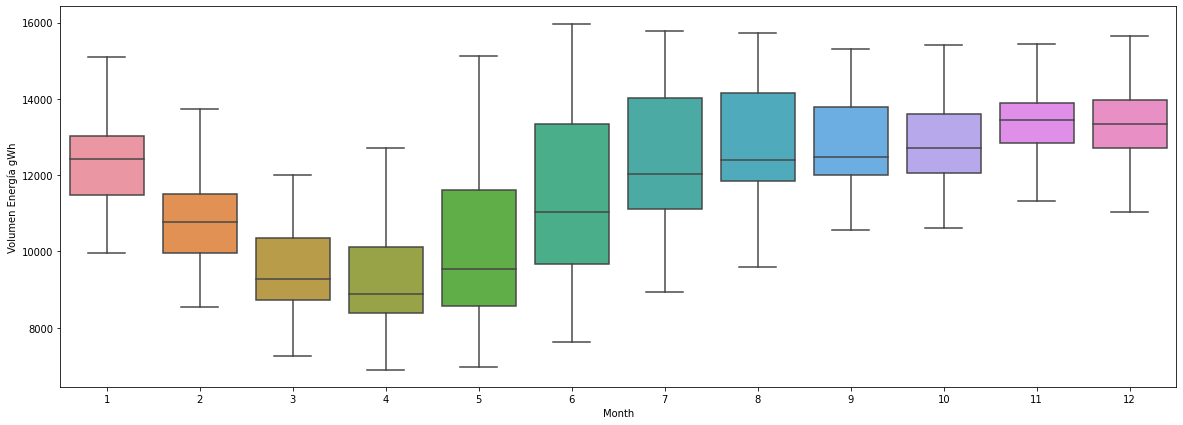

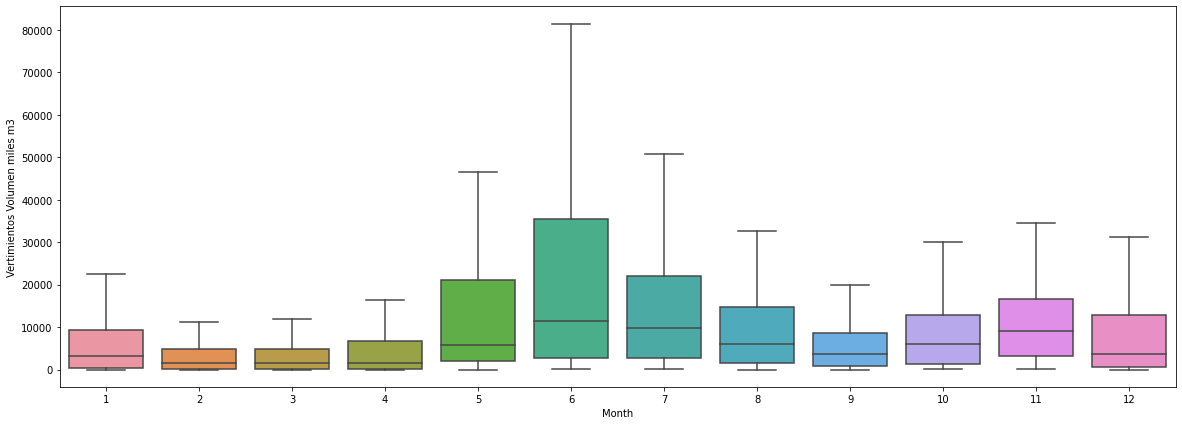

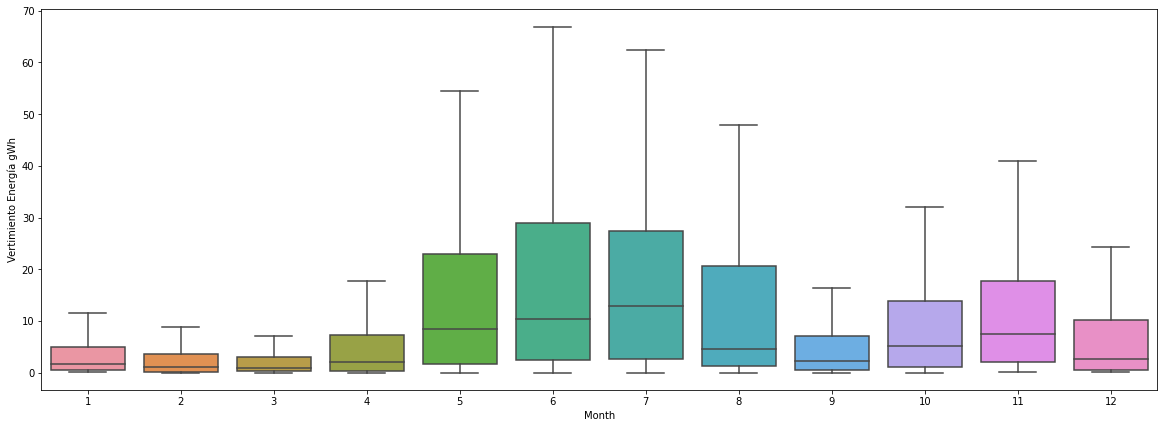

In [ ]:
for i in variables:
  fig, ax = plt.subplots(figsize=(20,7))
  sns.boxplot(data=df, x='Month', y=i, showfliers=False)
  plt.show()

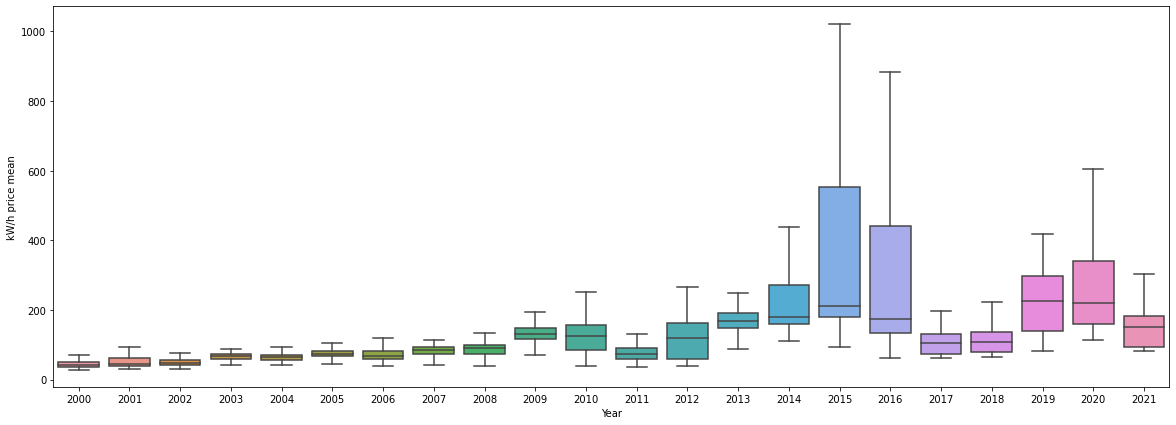

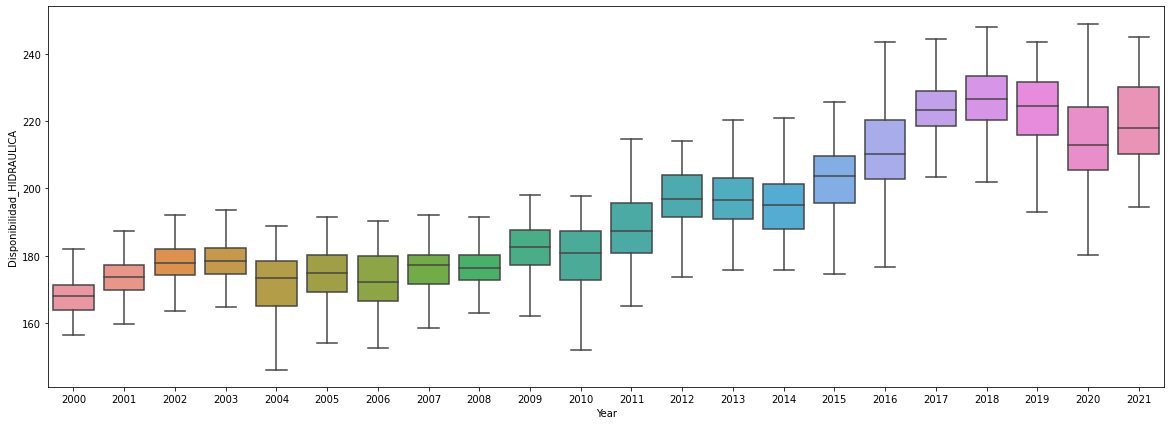

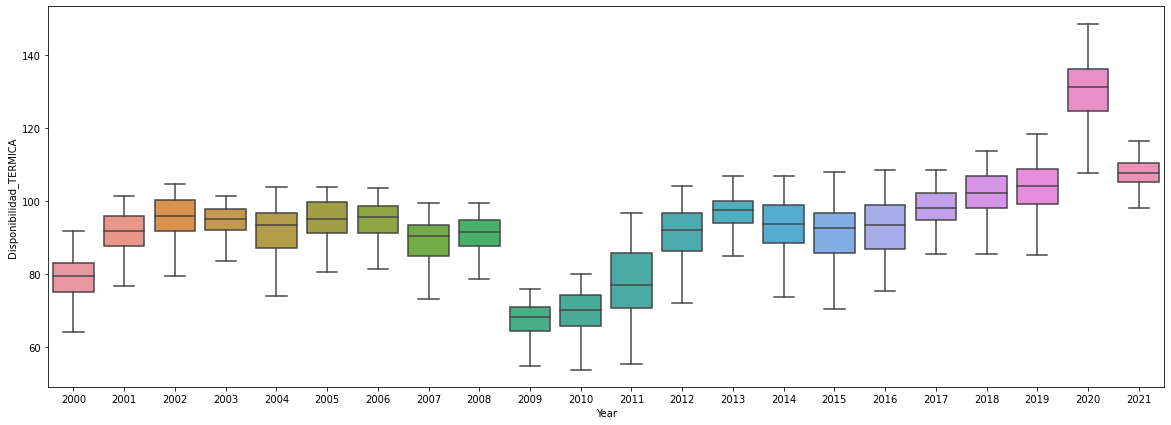

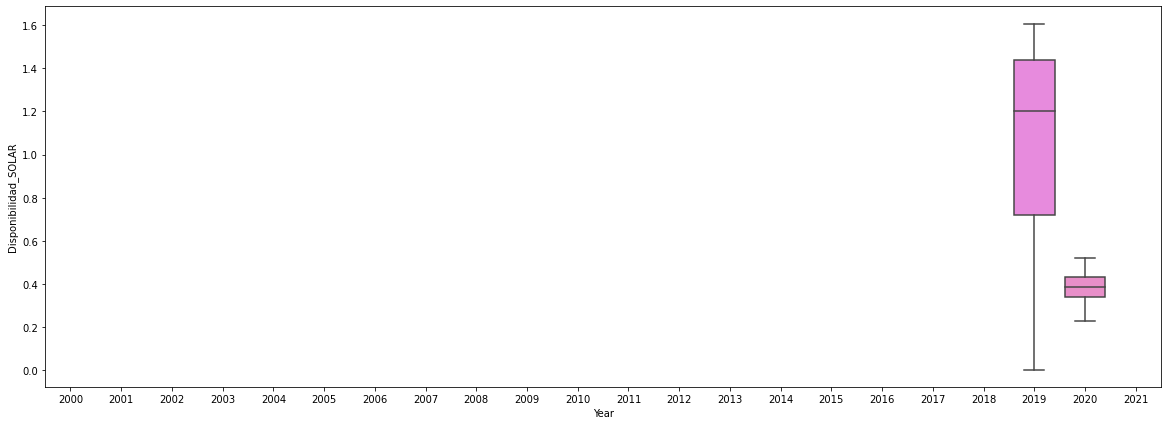

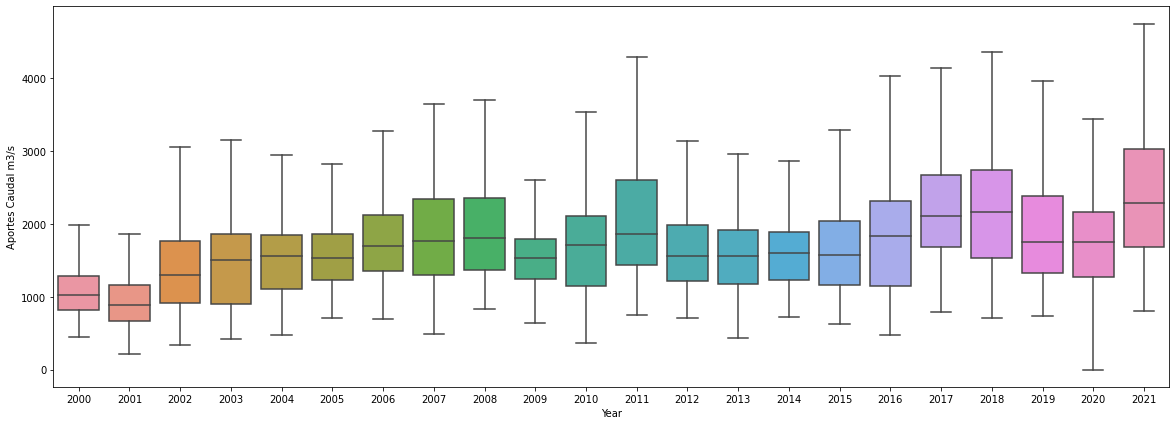

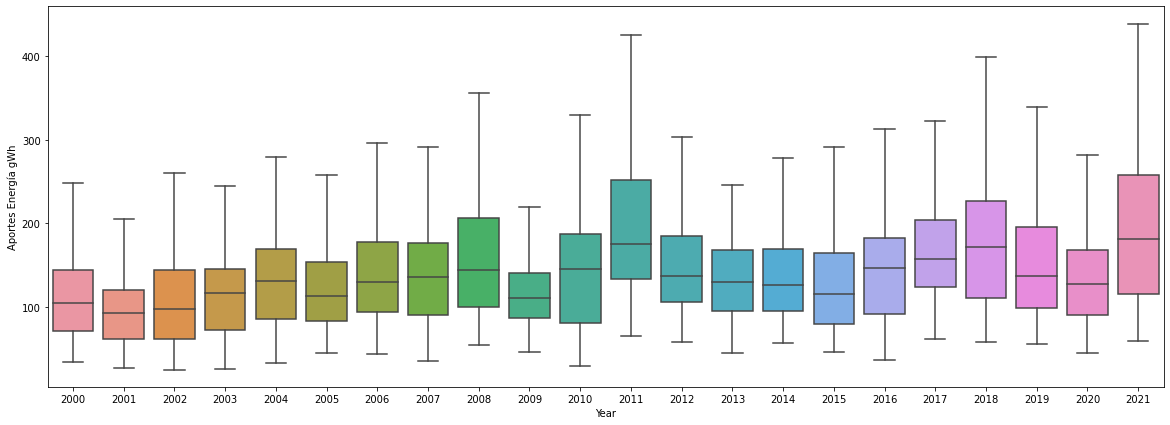

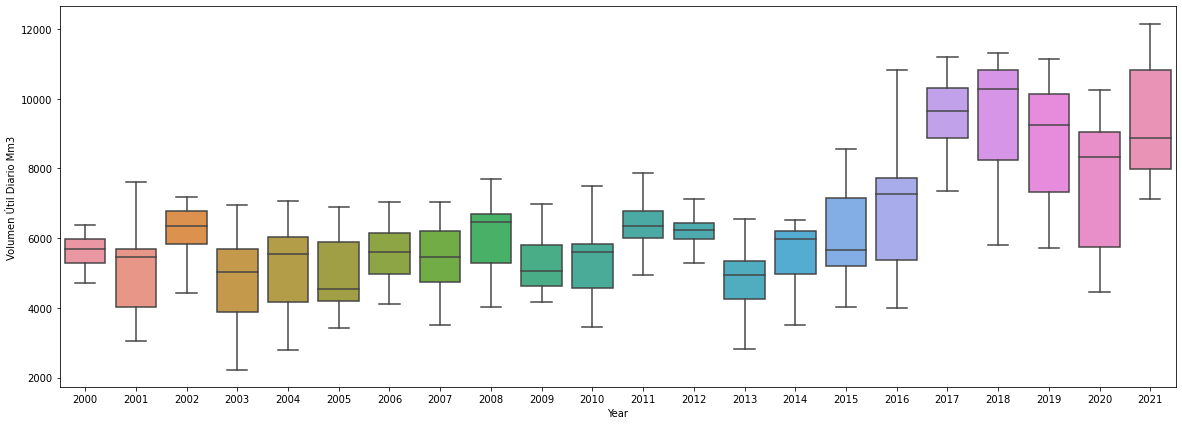

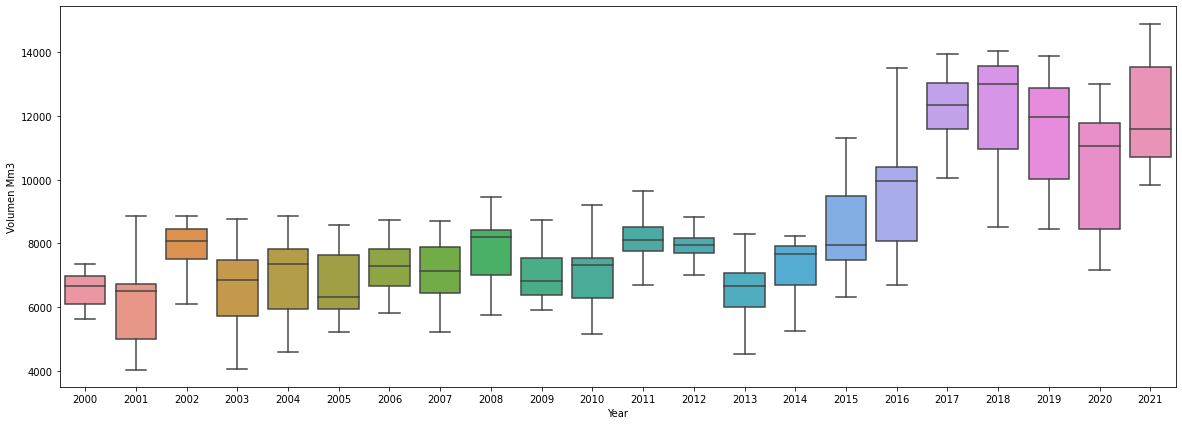

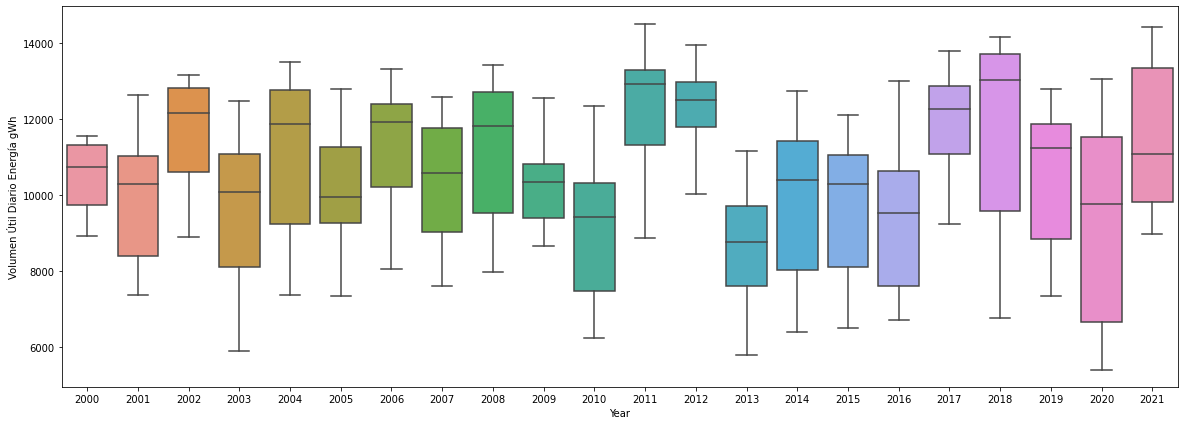

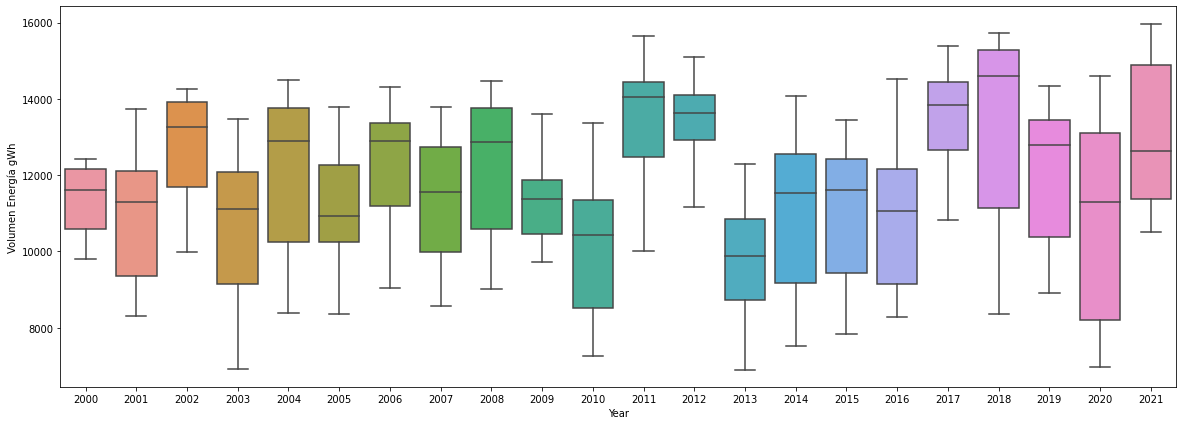

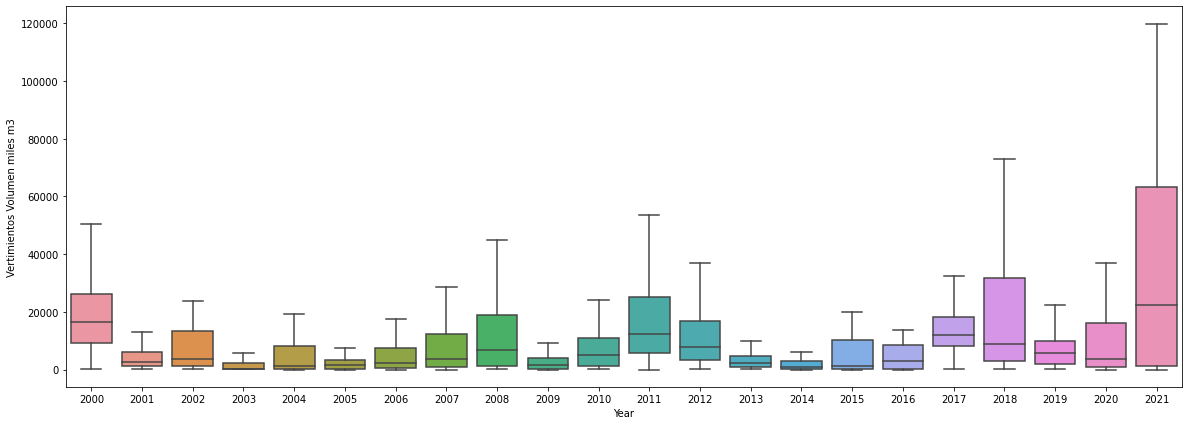

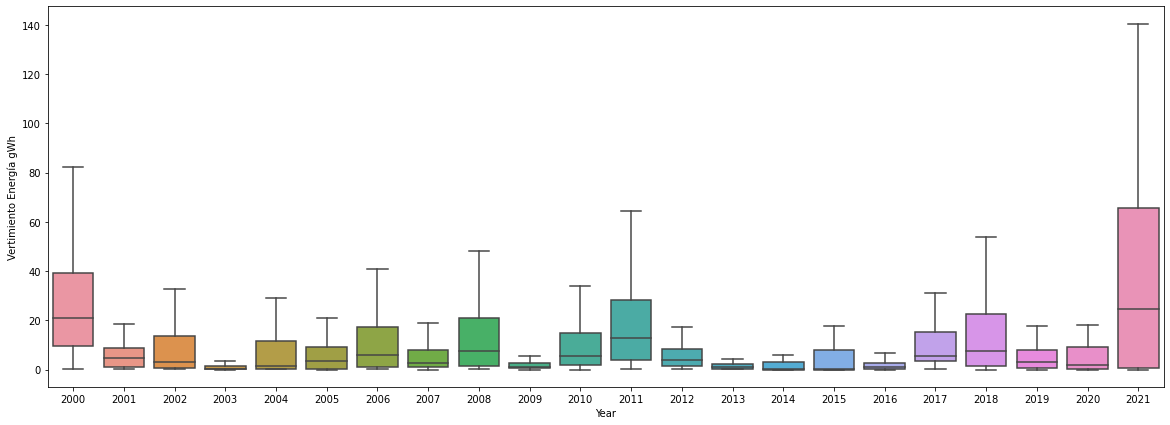

In [ ]:
for i in variables:
  fig, ax = plt.subplots(figsize=(20,7))
  sns.boxplot(data=df, x='Year', y=i, showfliers=False)
  plt.show()

Monthly:

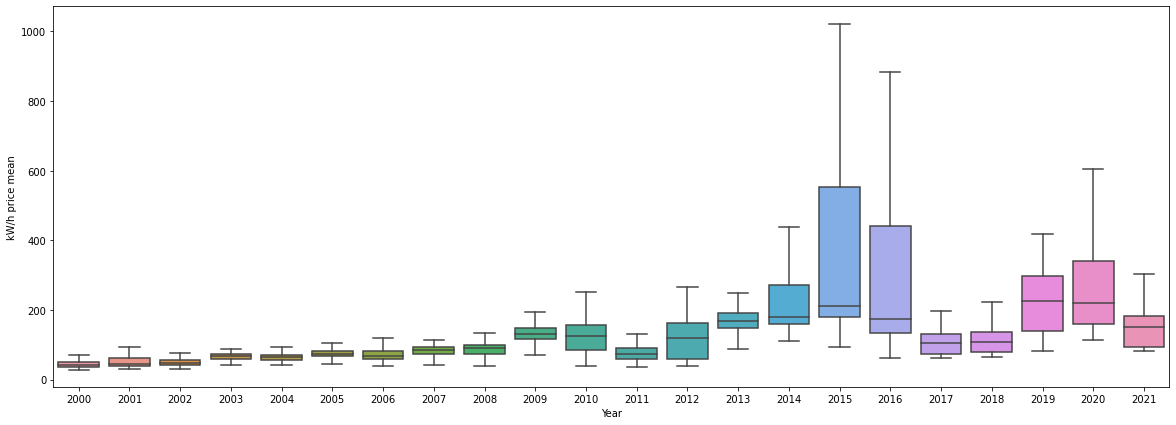

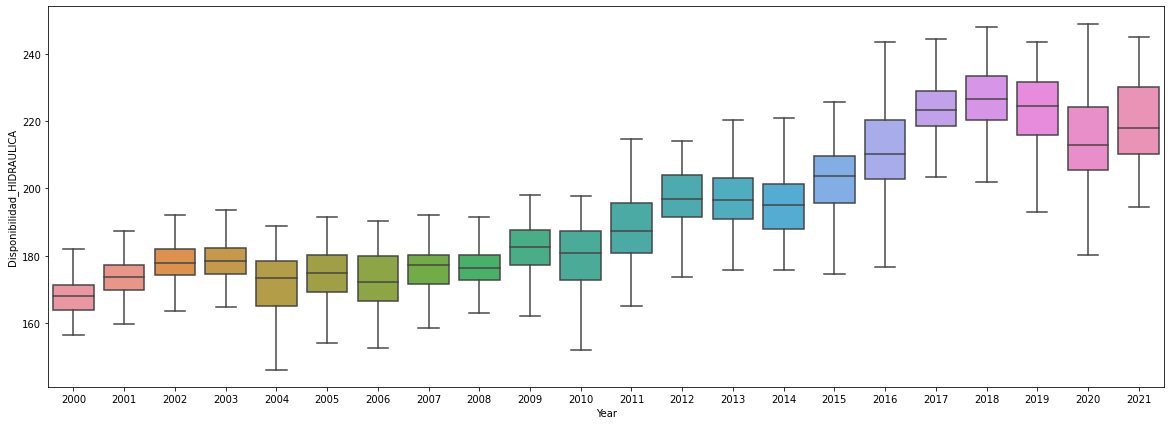

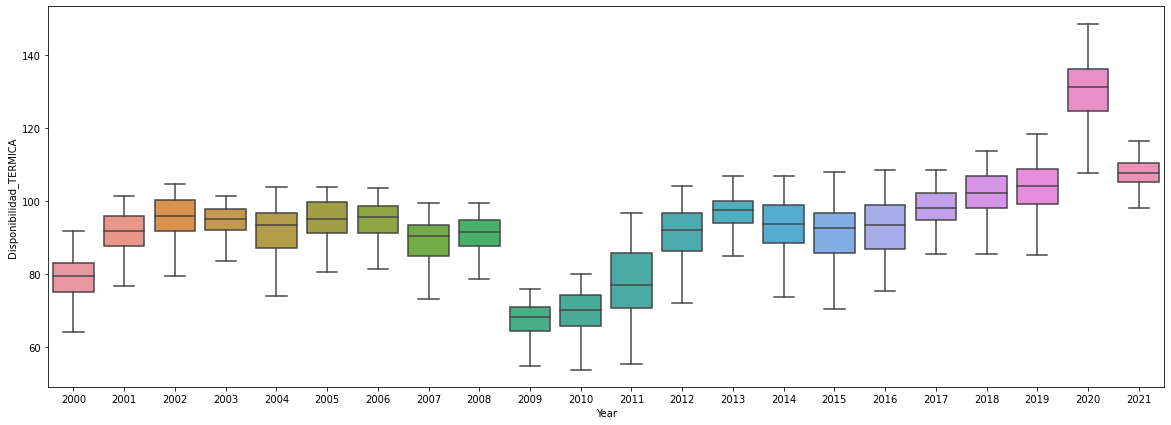

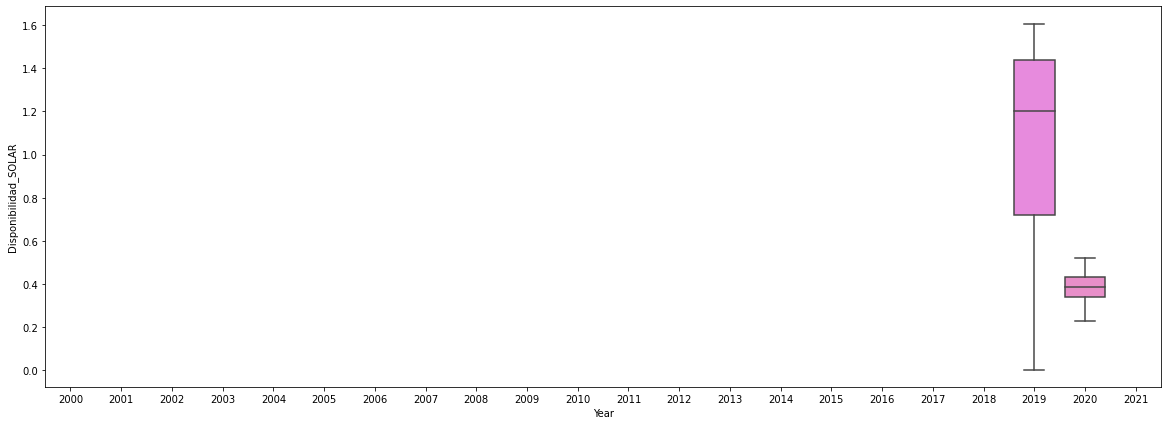

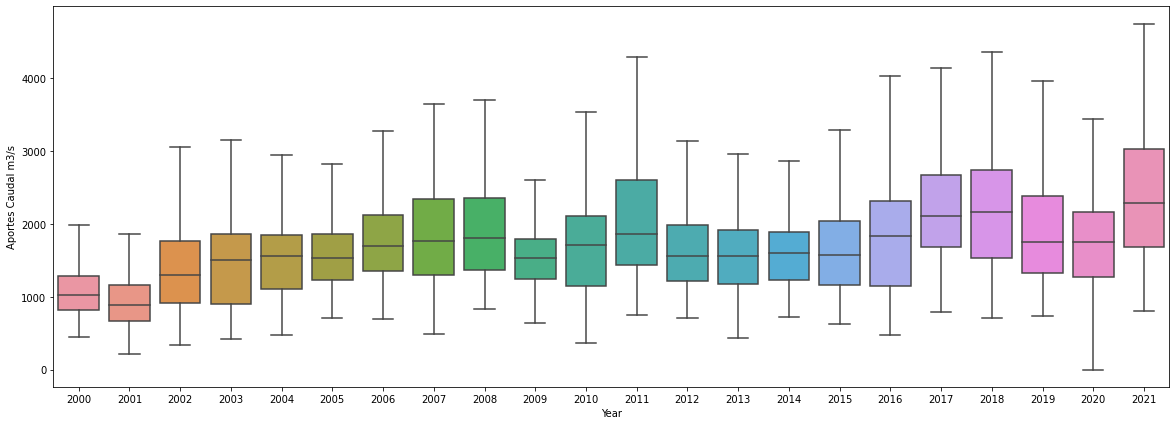

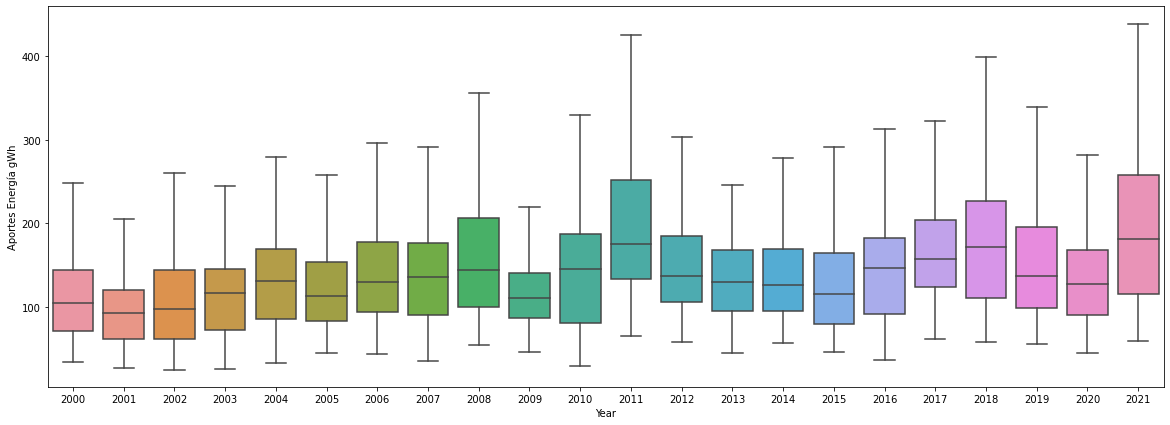

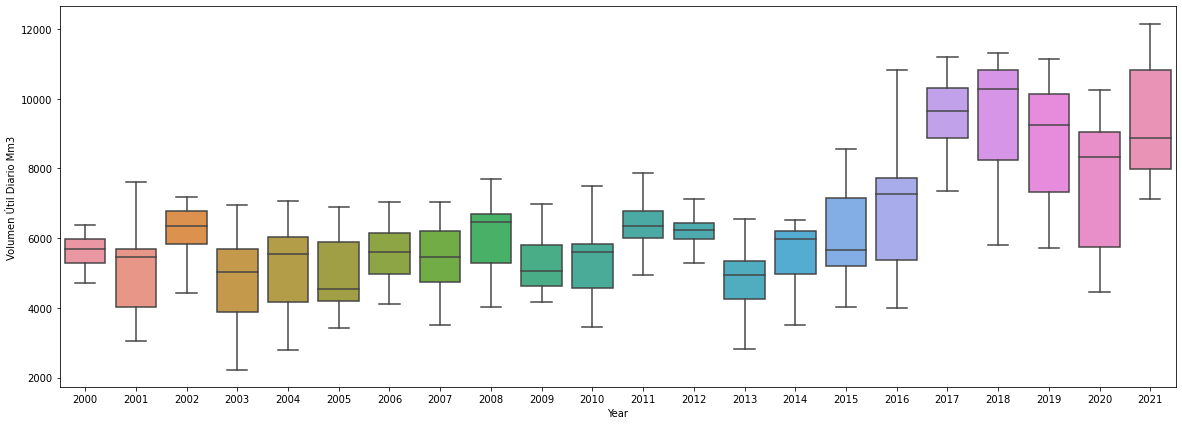

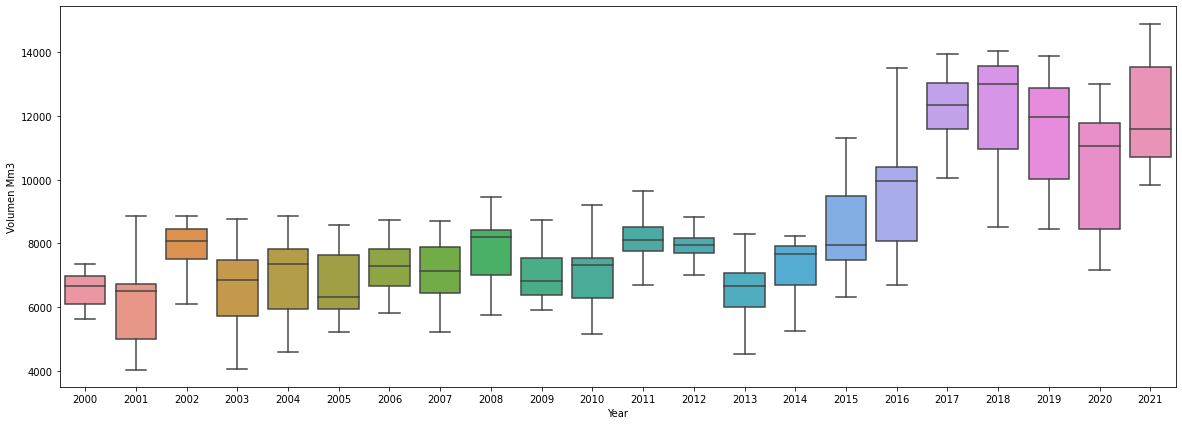

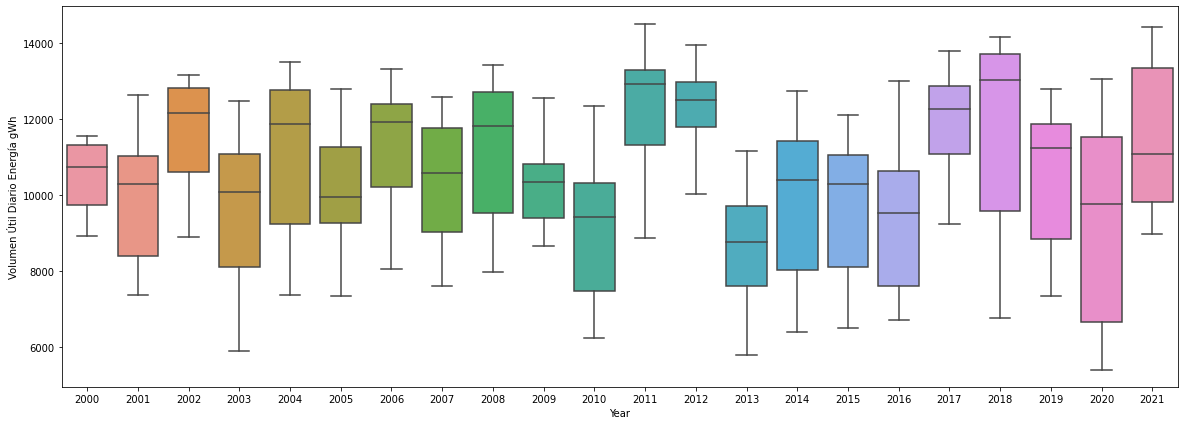

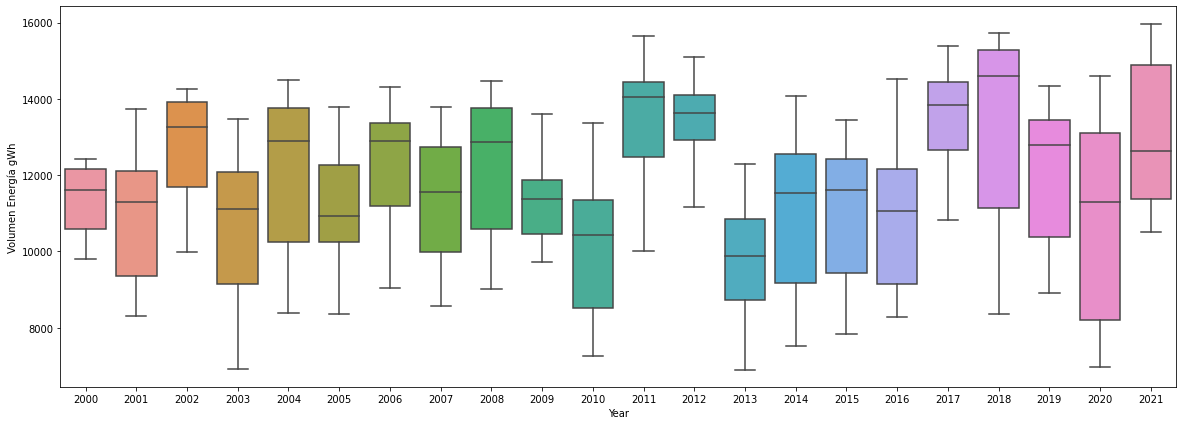

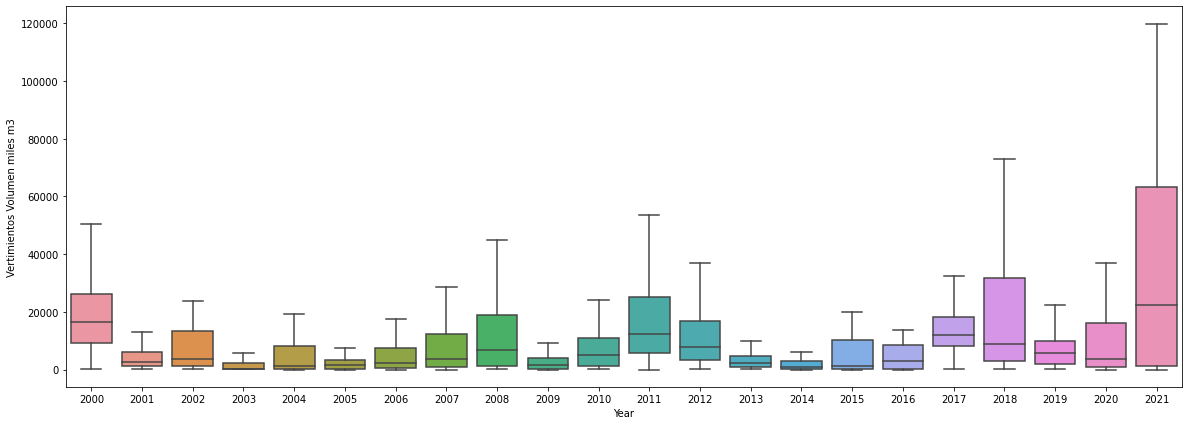

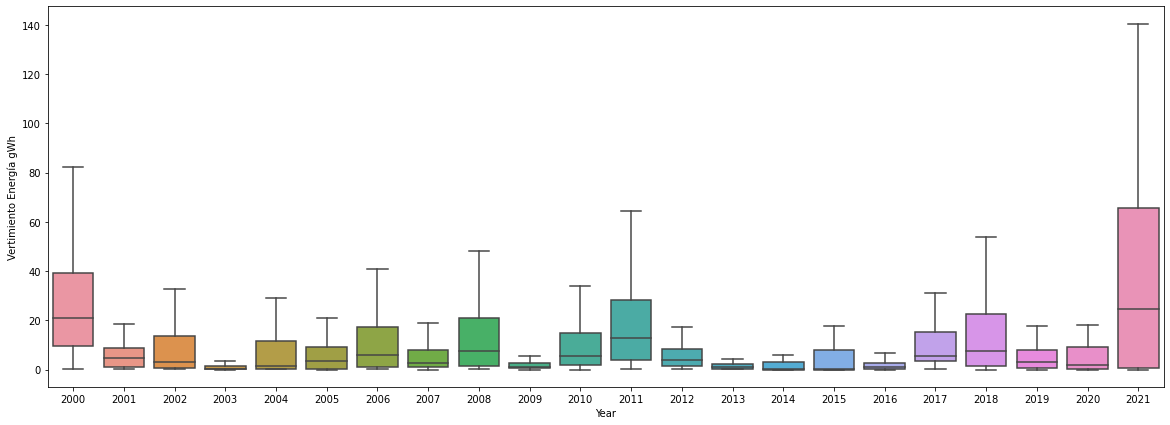

In [ ]:
for i in variables:
  fig, ax = plt.subplots(figsize=(20,7))
  sns.boxplot(data=df, x='Year', y=i, showfliers=False)
  plt.show()

Density (yearly differentiated):

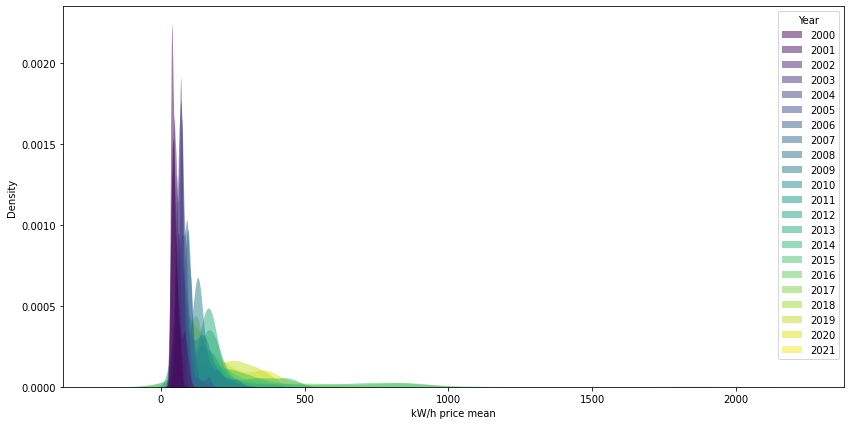

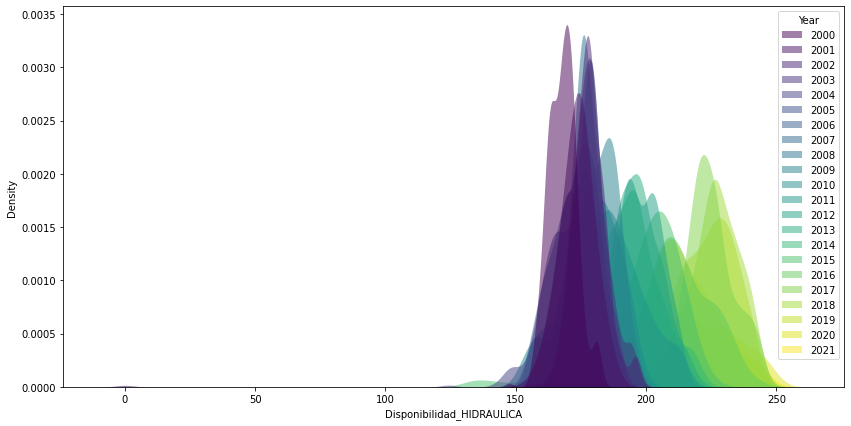

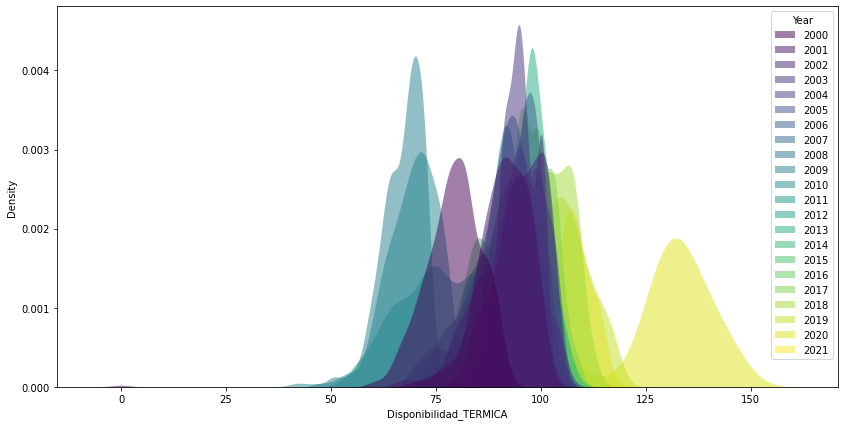

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

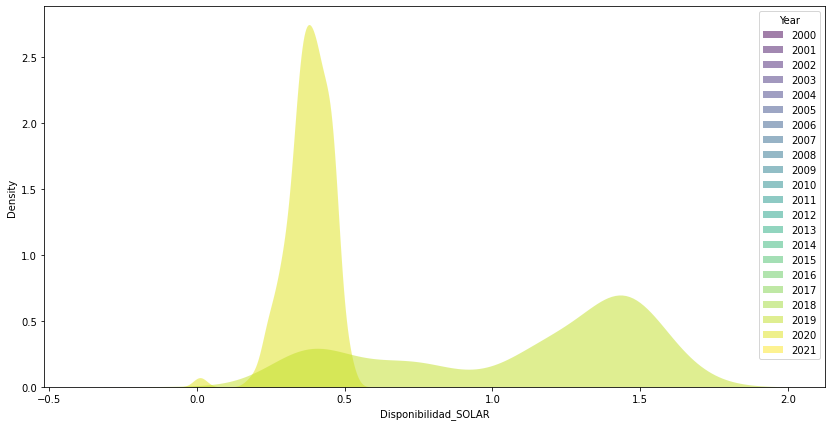

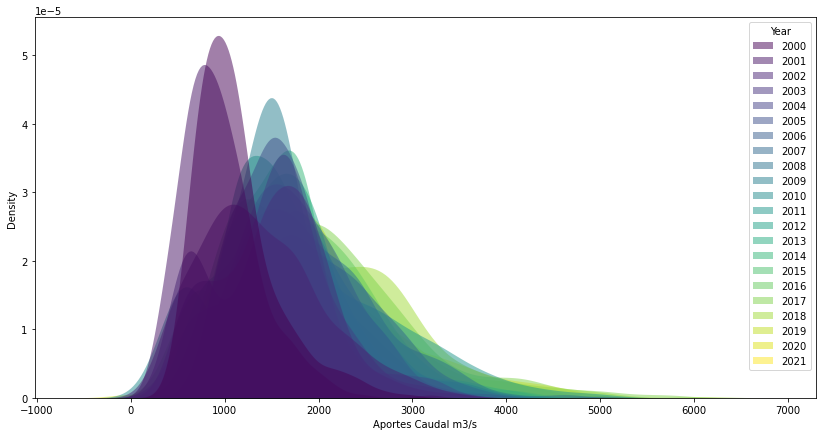

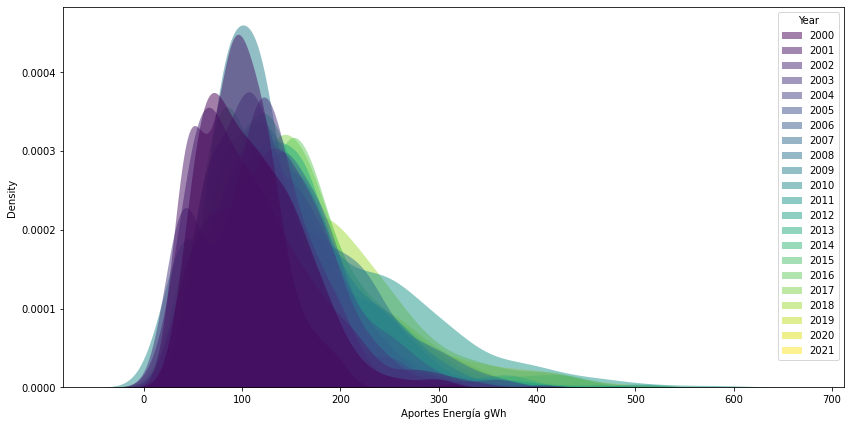

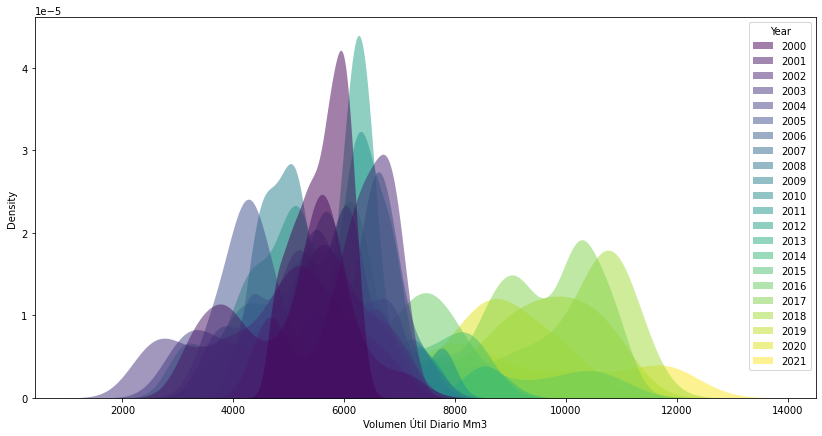

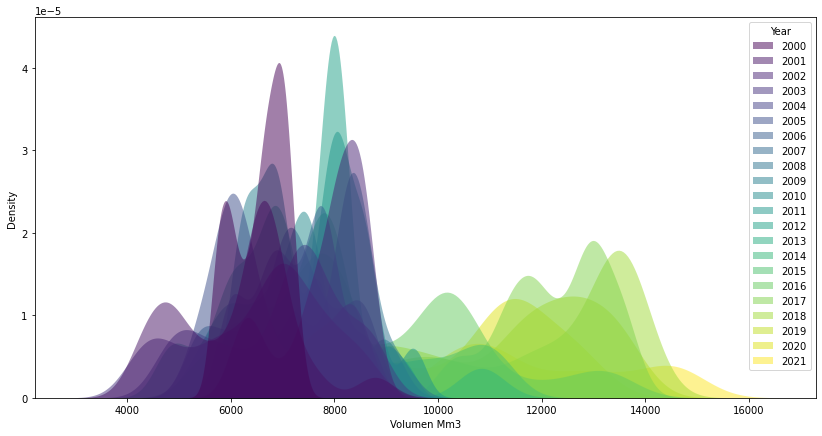

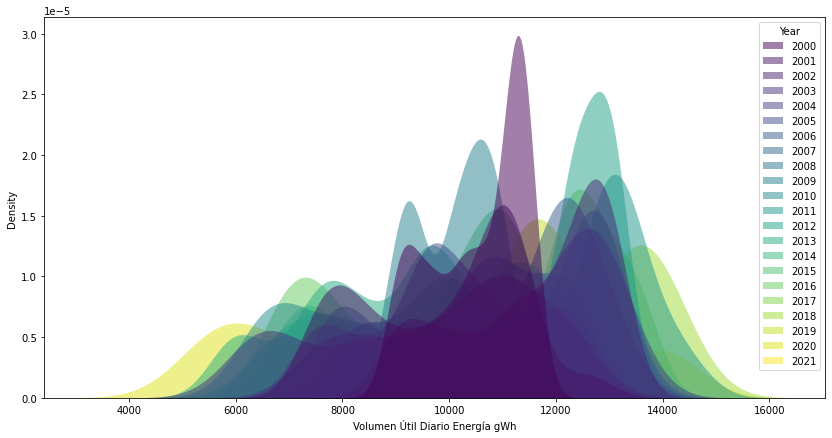

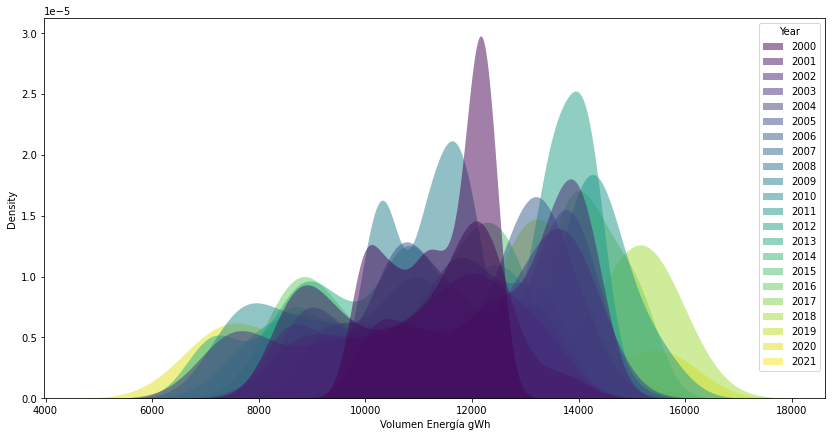

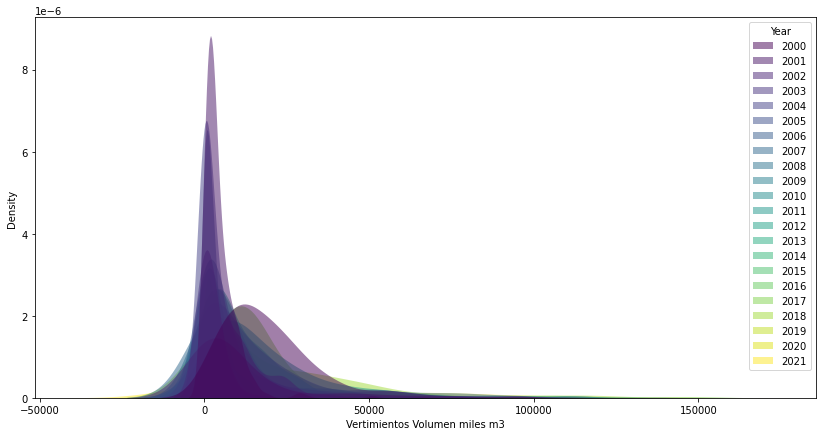

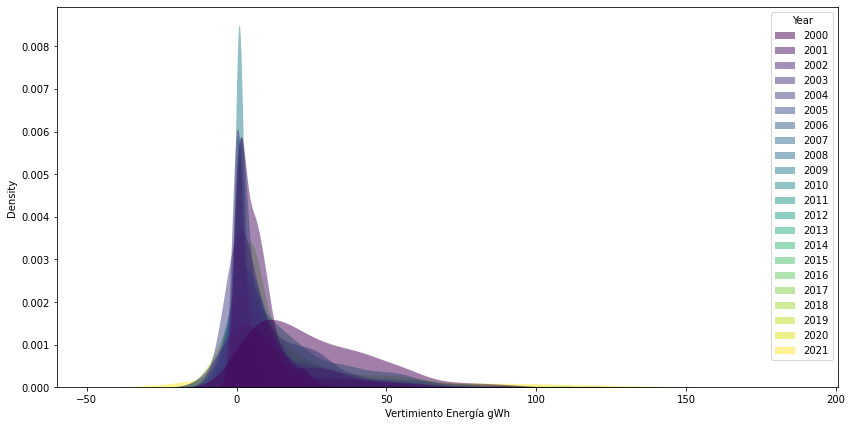

In [ ]:
for i in variables:
  fig, ax = plt.subplots(figsize=(14,7), )
  sns.kdeplot(data = df, x=i, hue = 'Year', fill=True, alpha=.5, linewidth=0, palette = 'viridis')
  plt.show()

Density (monthly differentiated):

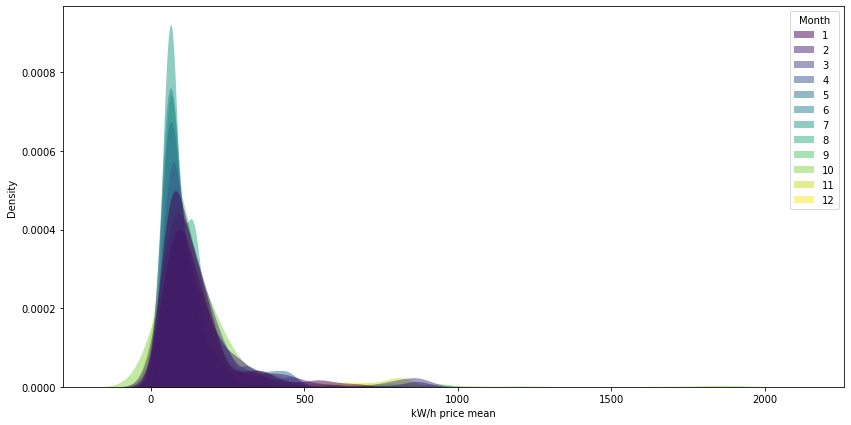

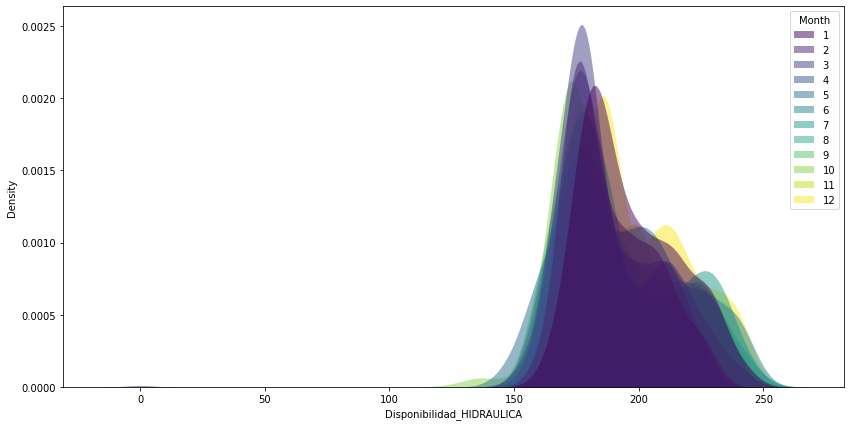

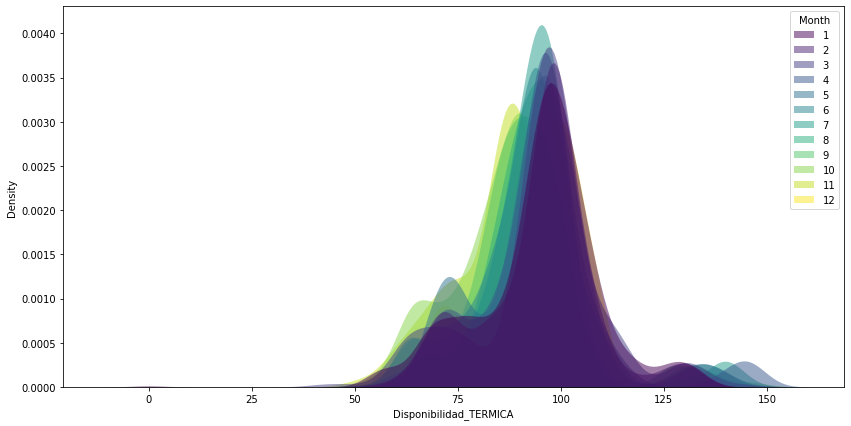

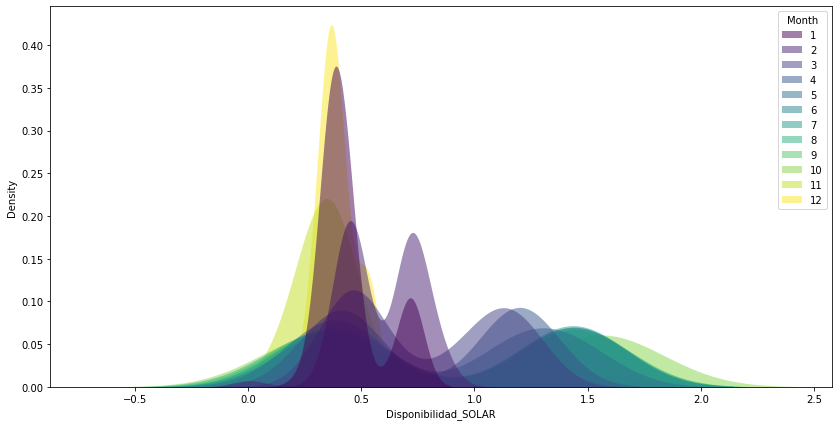

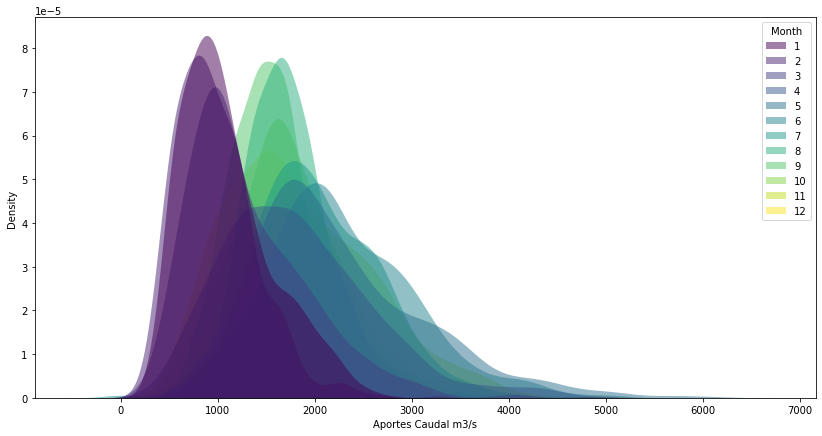

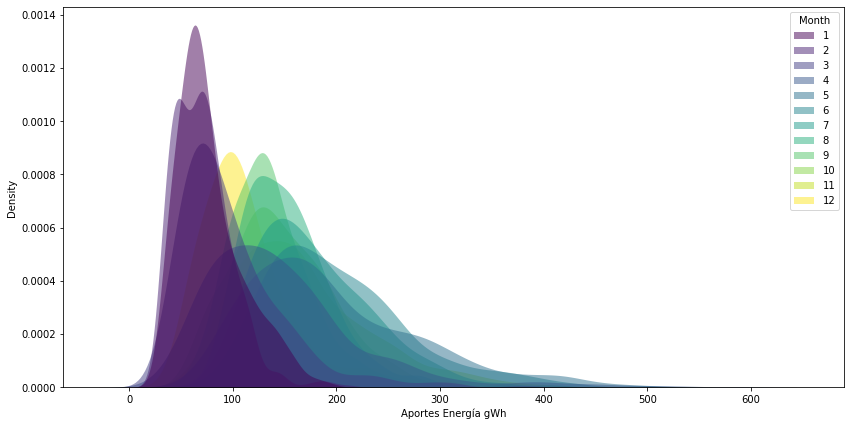

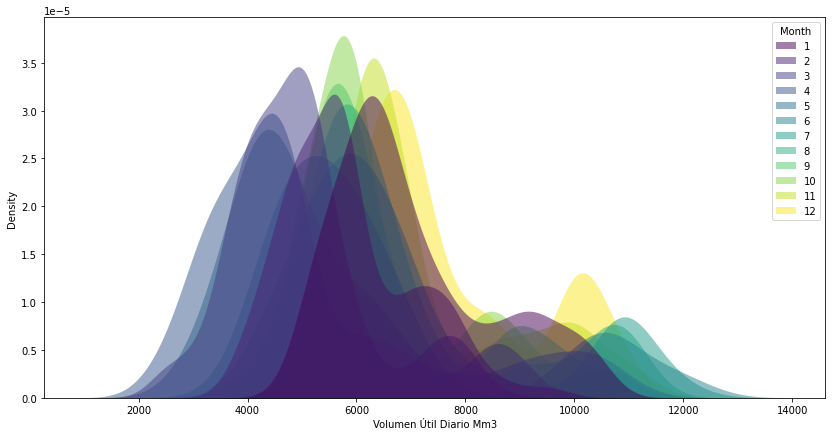

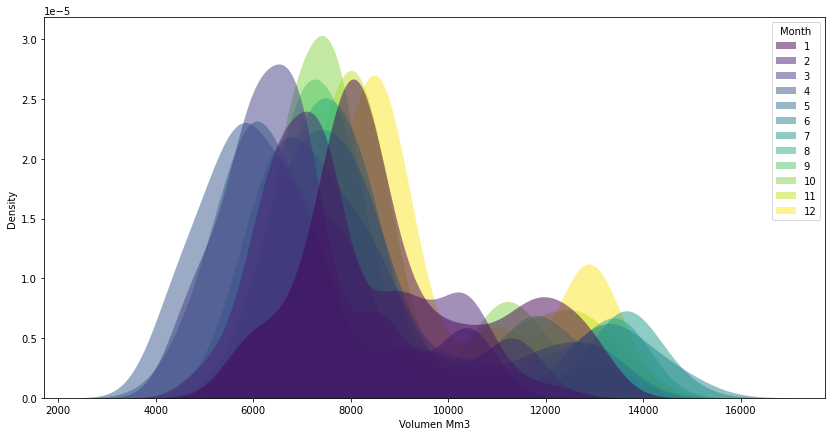

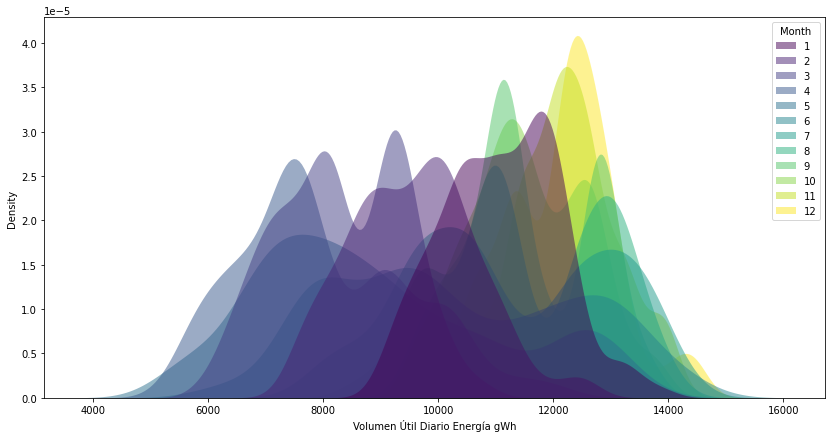

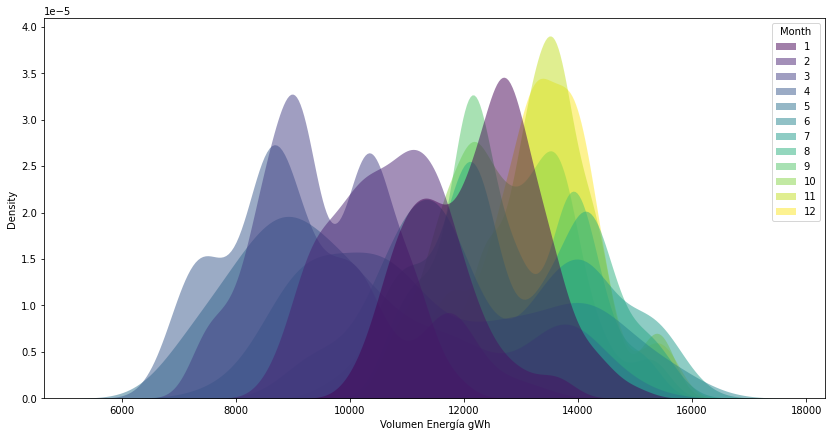

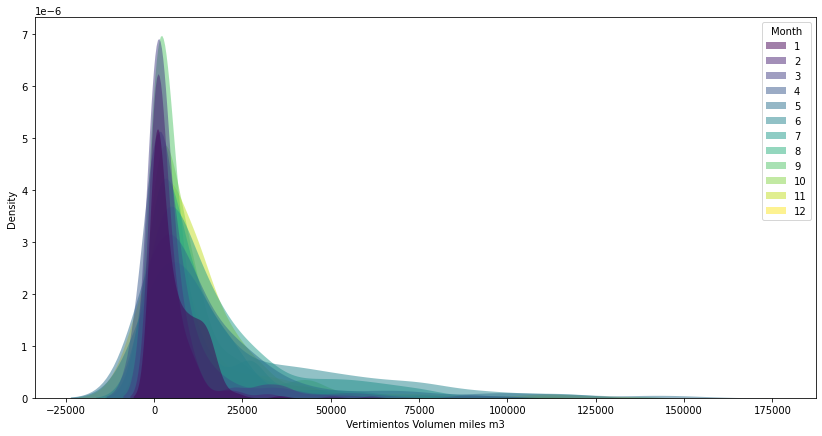

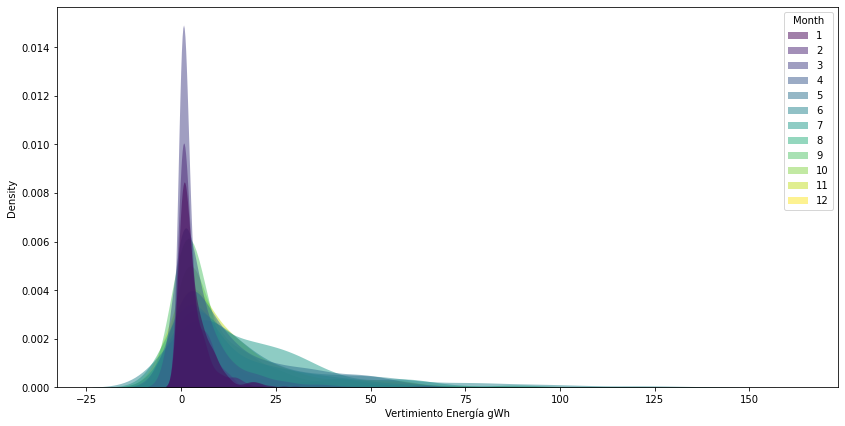

In [ ]:
for i in variables:
  fig, ax = plt.subplots(figsize=(14,7), )
  sns.kdeplot(data = df, x=i, hue = 'Month', fill=True, alpha=.5, linewidth=0, palette = 'viridis')
  plt.show()

### Lagplots:

kW/h price mean


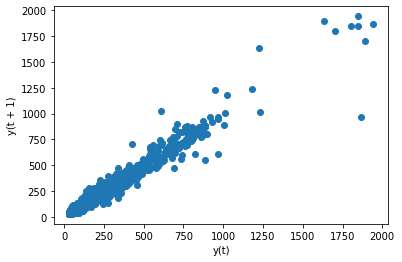

Disponibilidad_HIDRAULICA


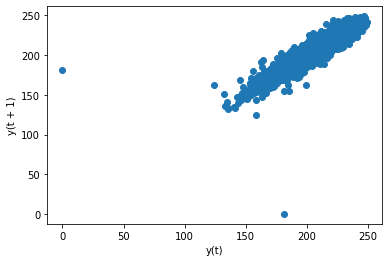

Disponibilidad_TERMICA


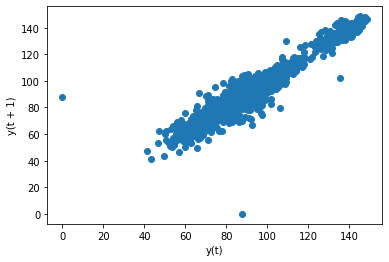

Disponibilidad_SOLAR


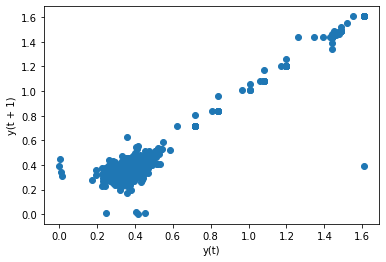

Aportes Caudal m3/s


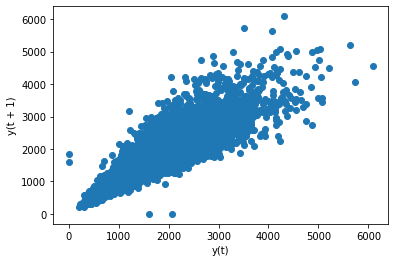

Aportes Energía gWh


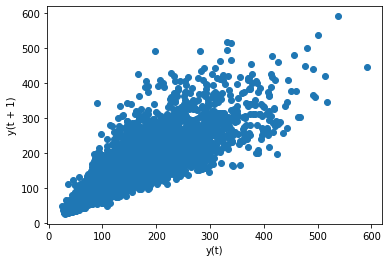

Volumen Útil Diario Mm3


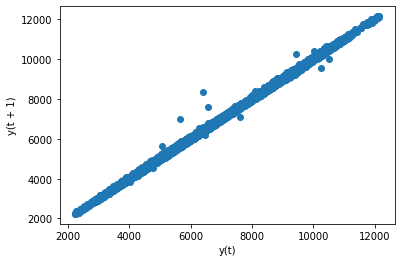

Volumen Mm3


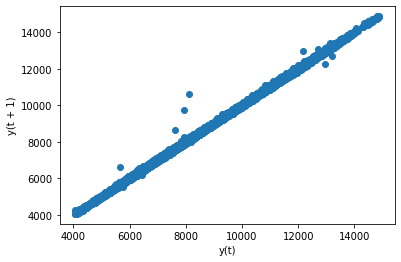

Volumen Útil Diario Energía gWh


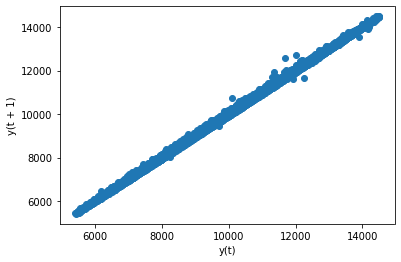

Volumen Energía gWh


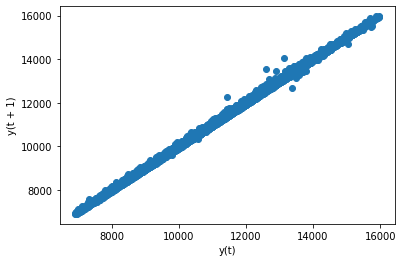

Vertimientos Volumen miles m3


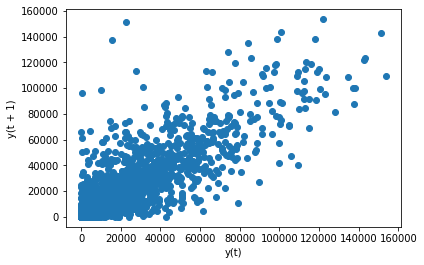

Vertimiento Energía gWh


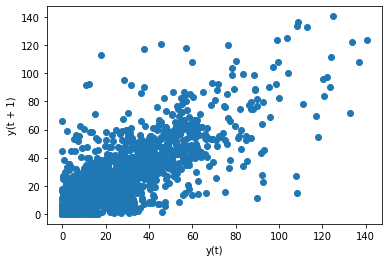

In [ ]:
for i in variables:
  print(i)
  lag_plot(df[i])
  plt.show()

### Seasonal Decomposition:

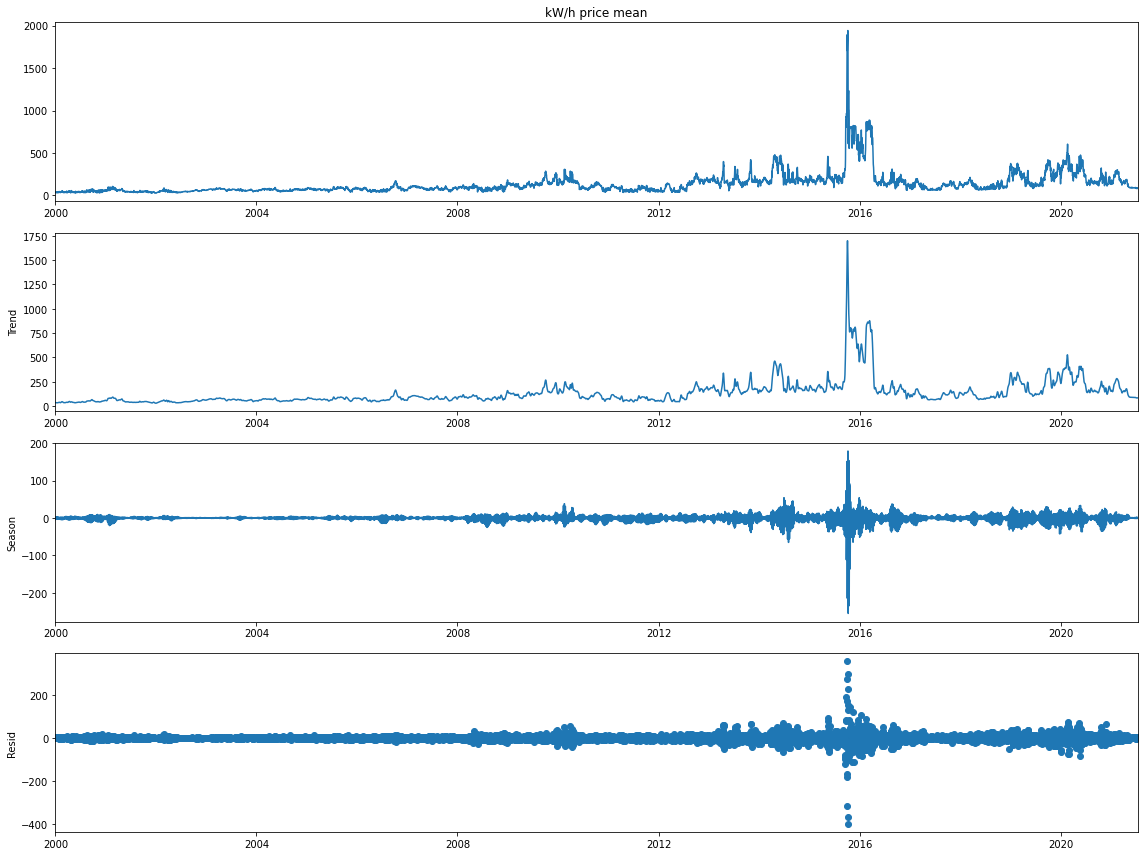

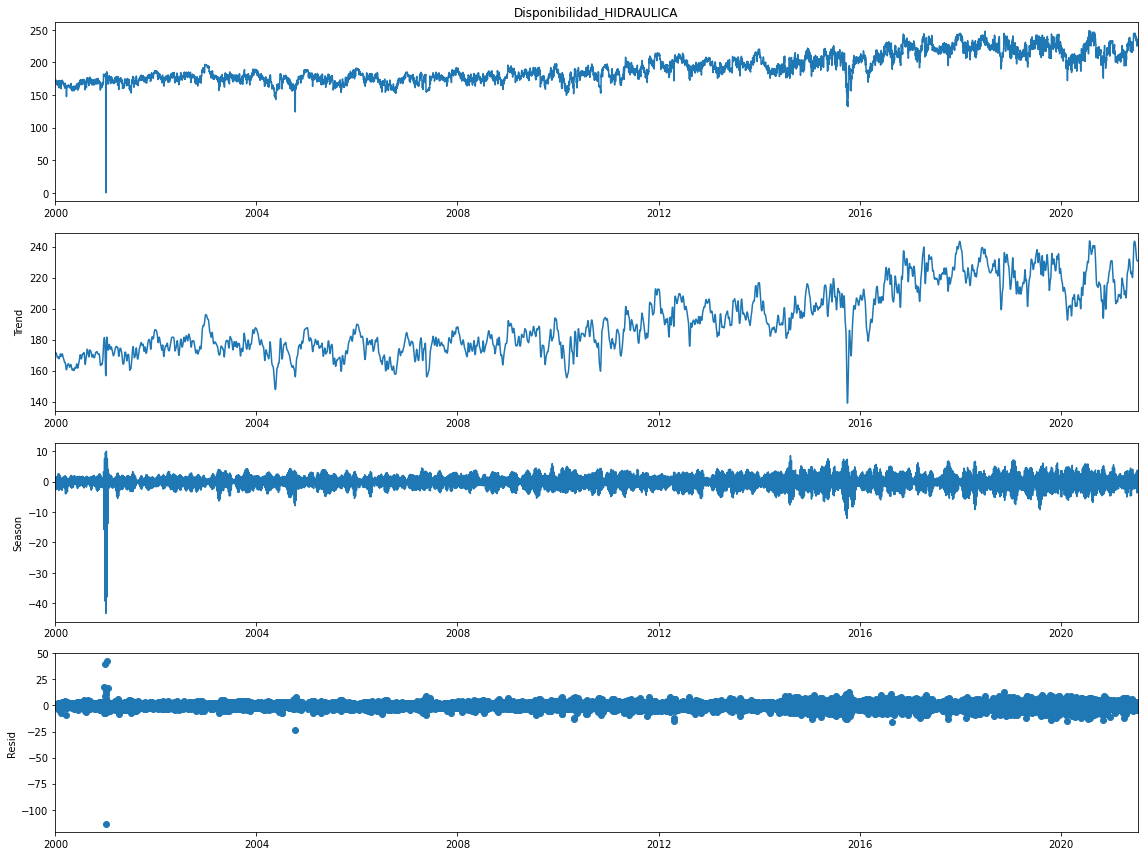

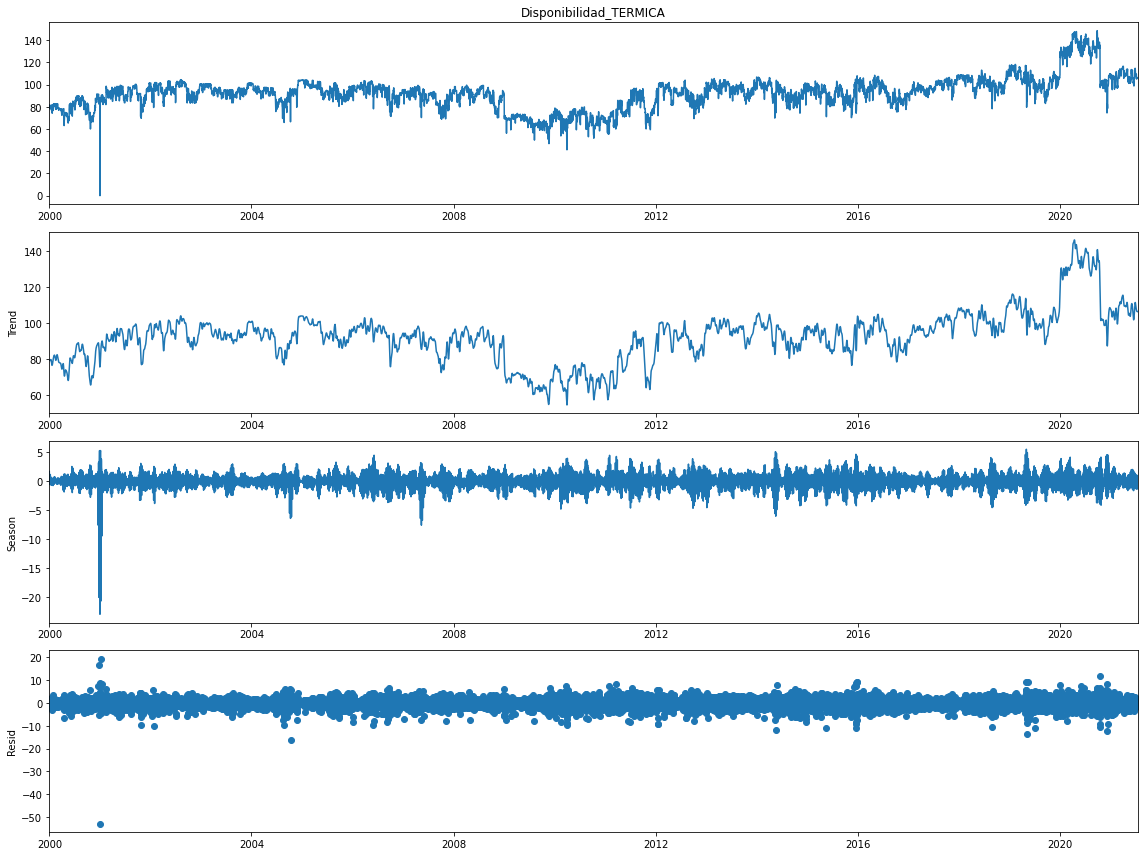

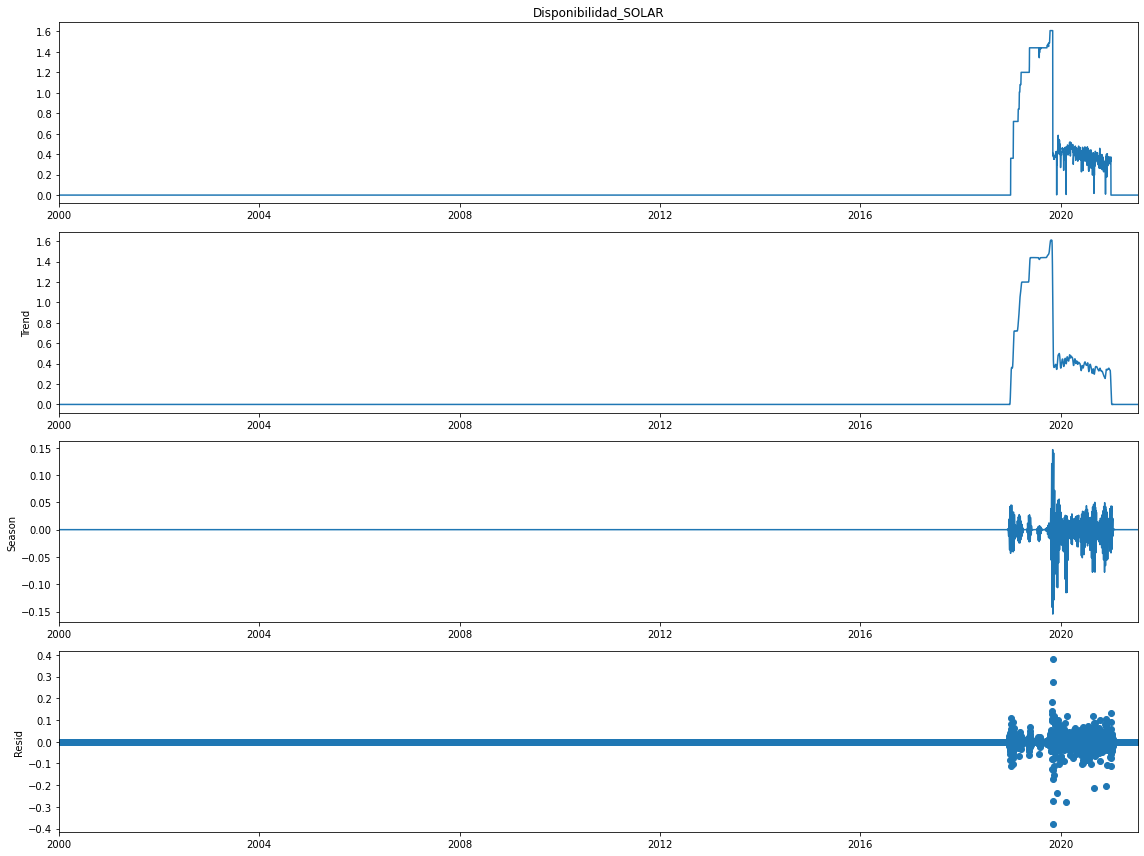

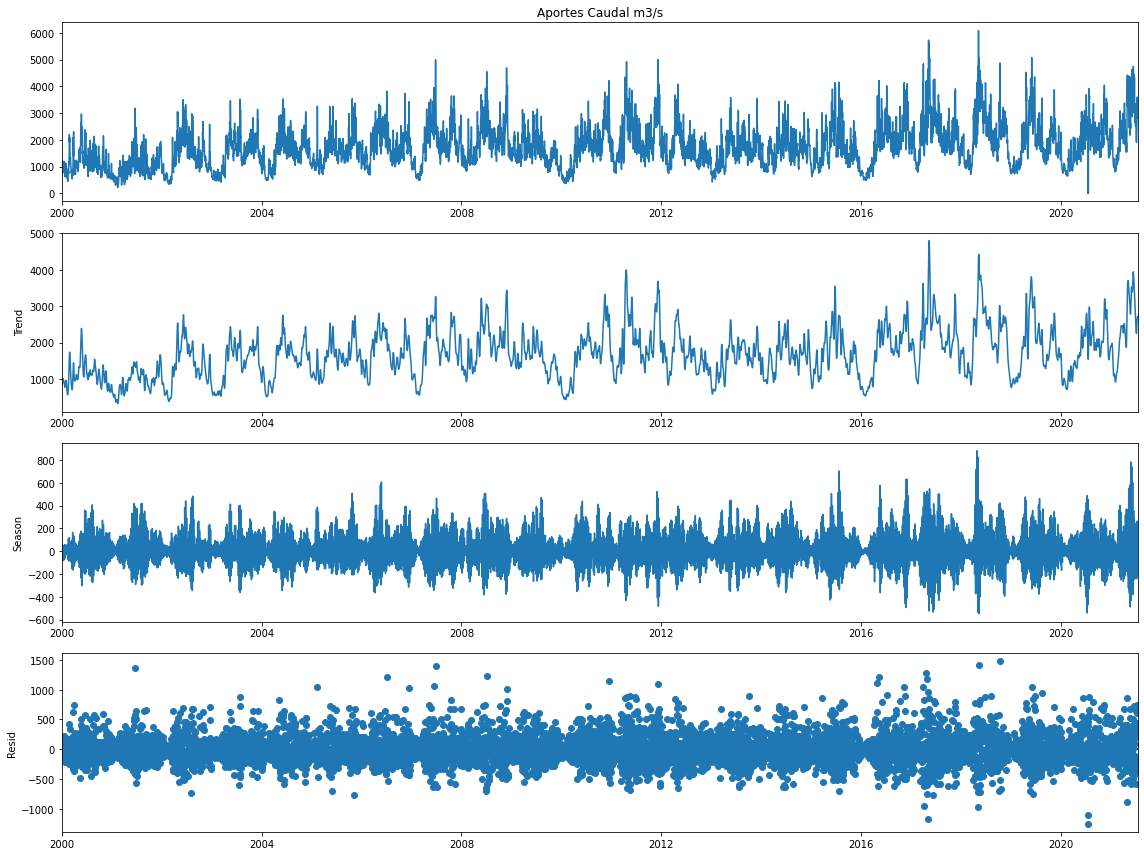

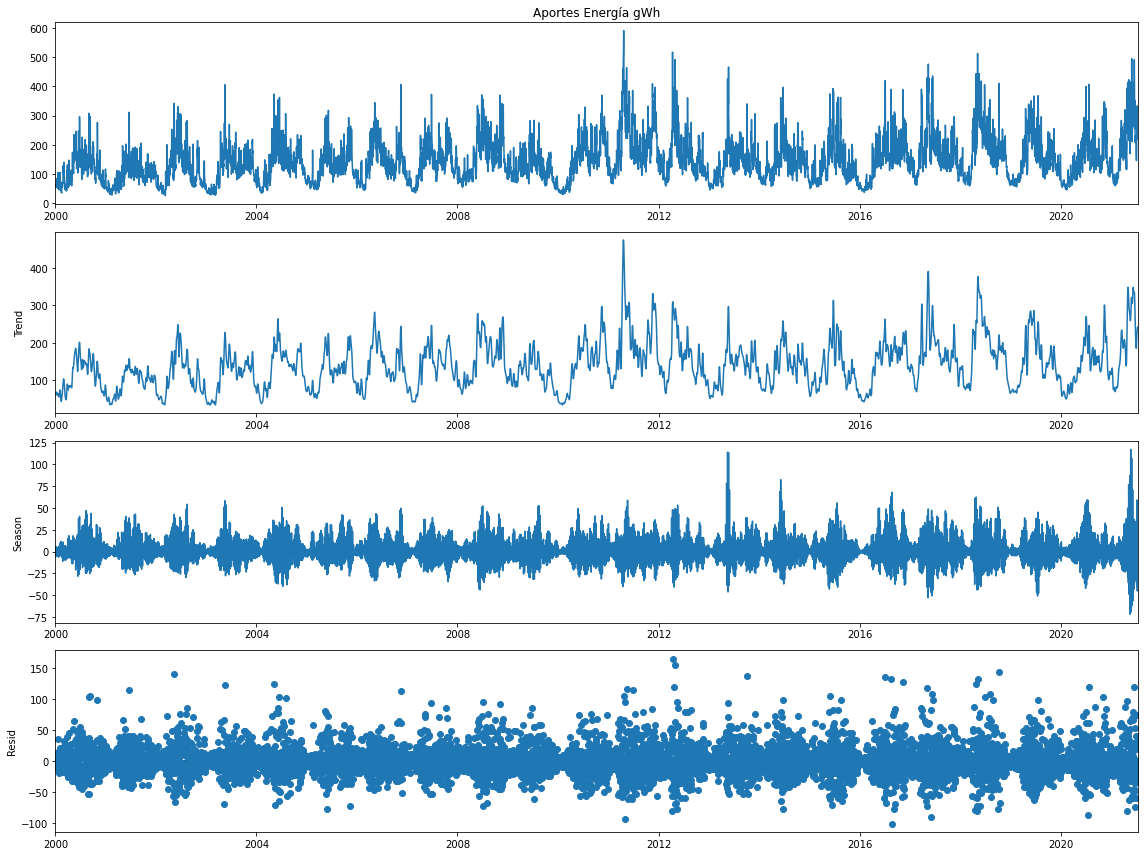

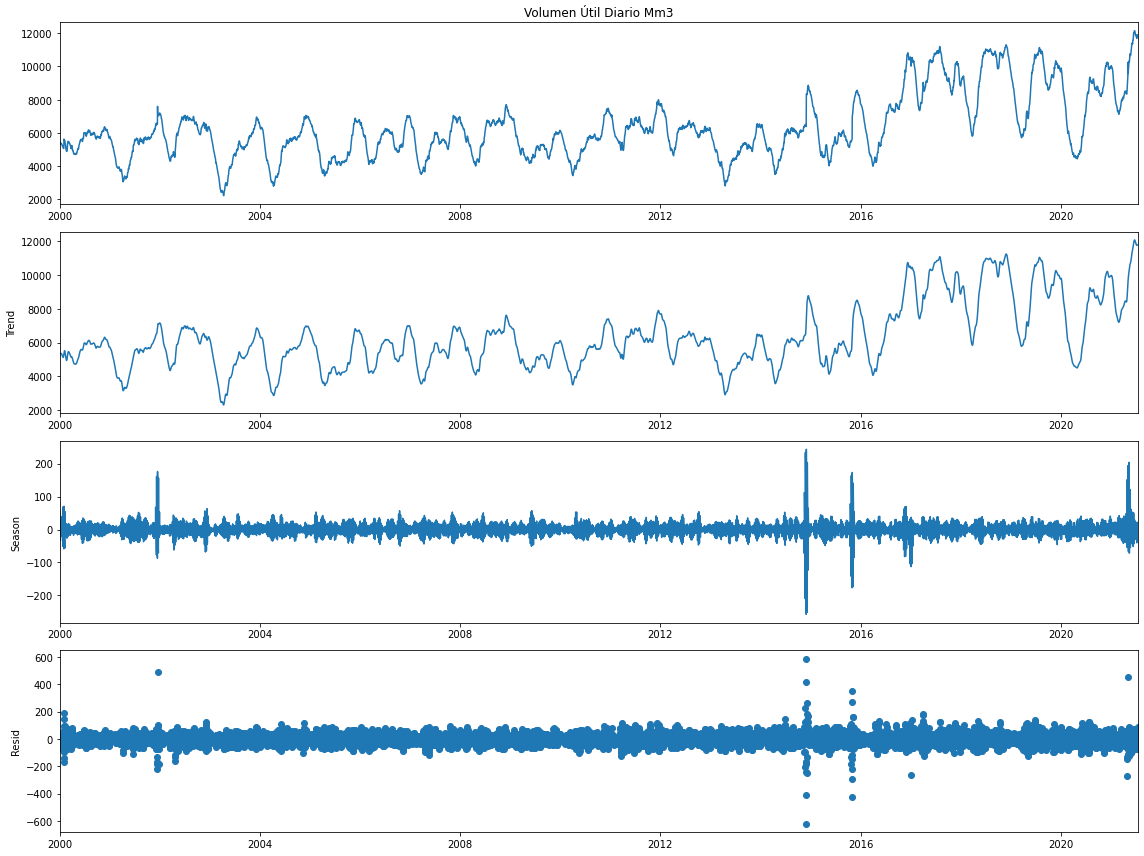

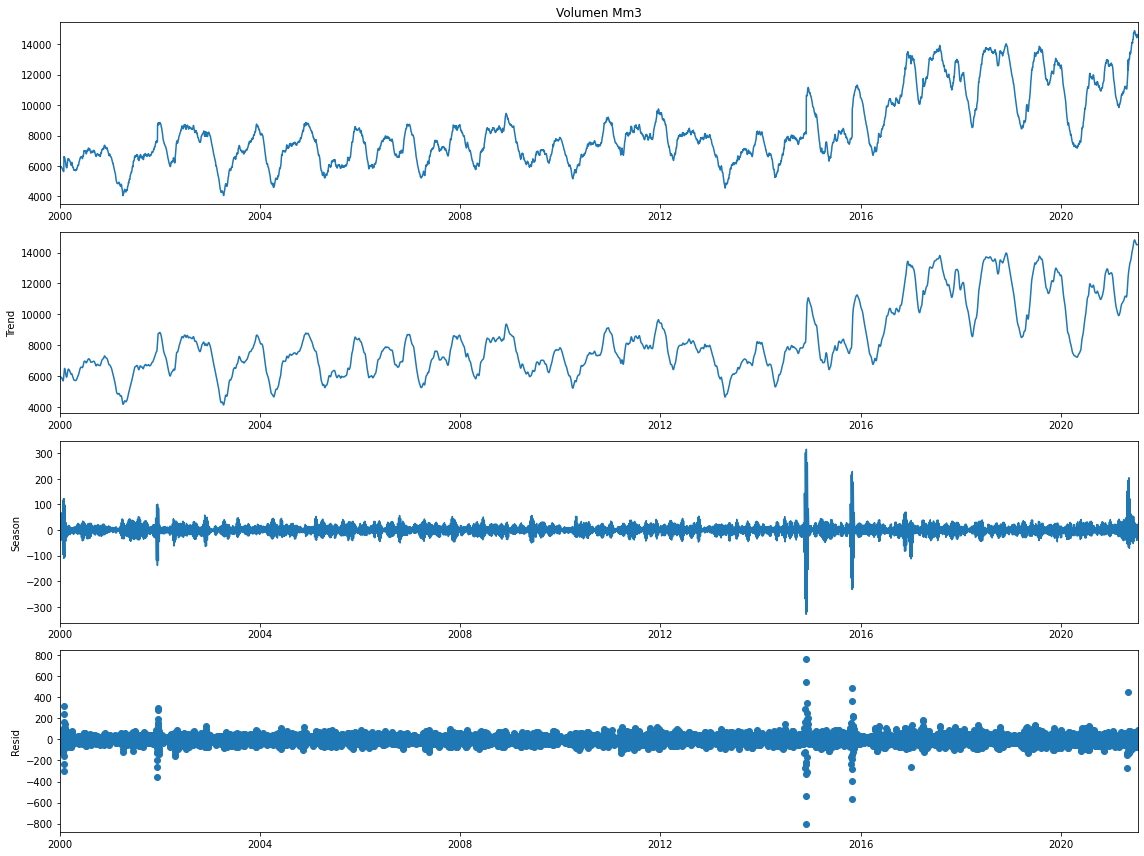

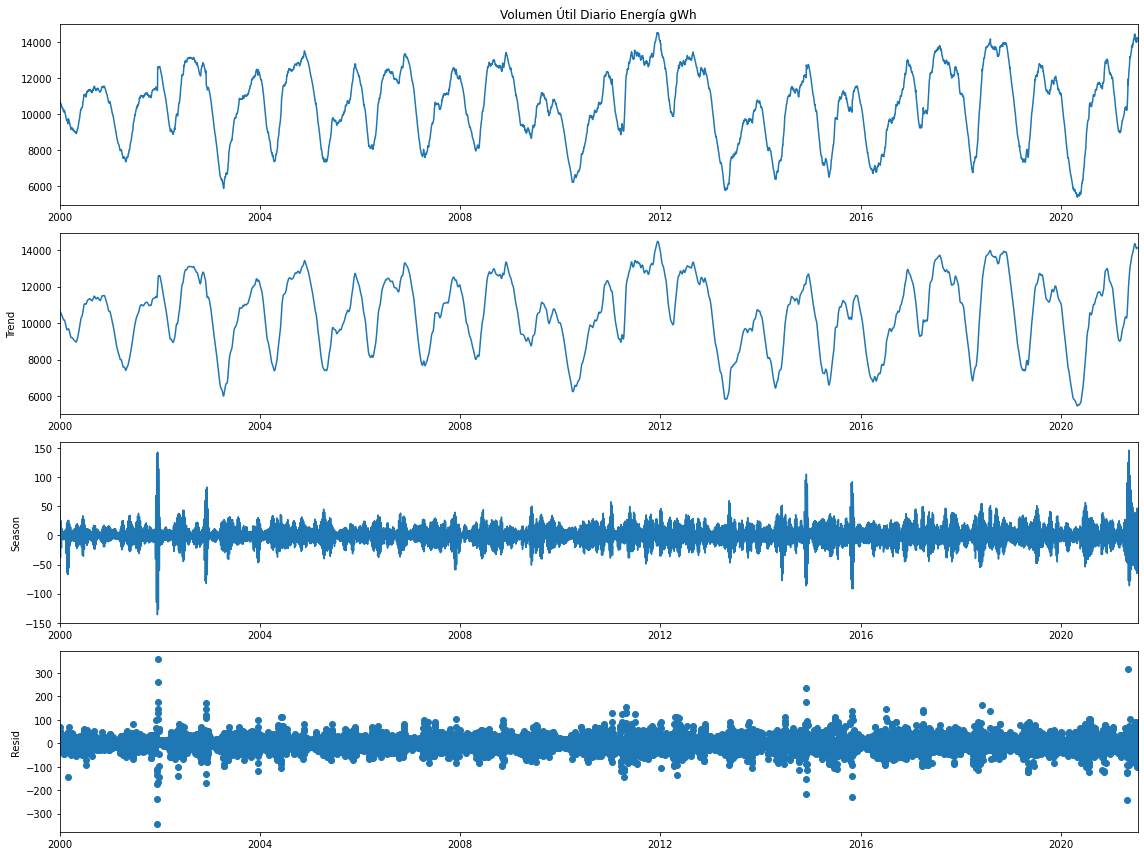

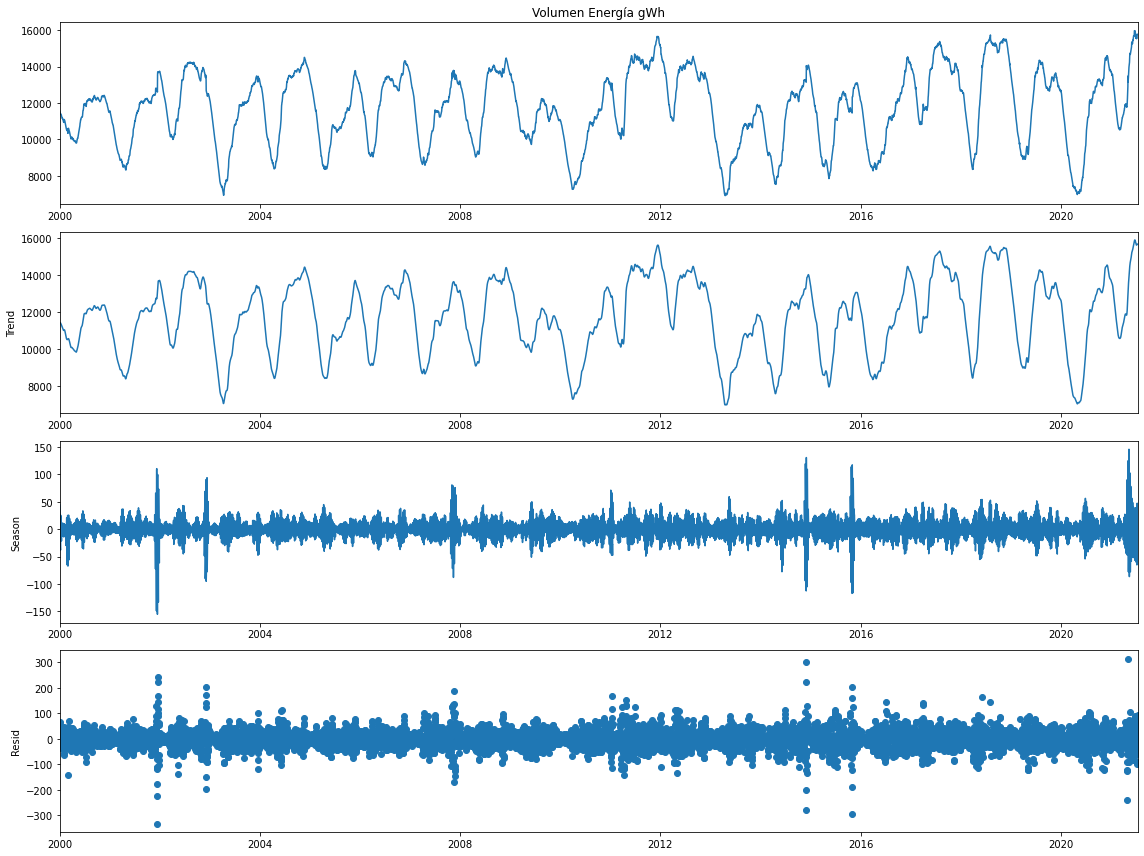

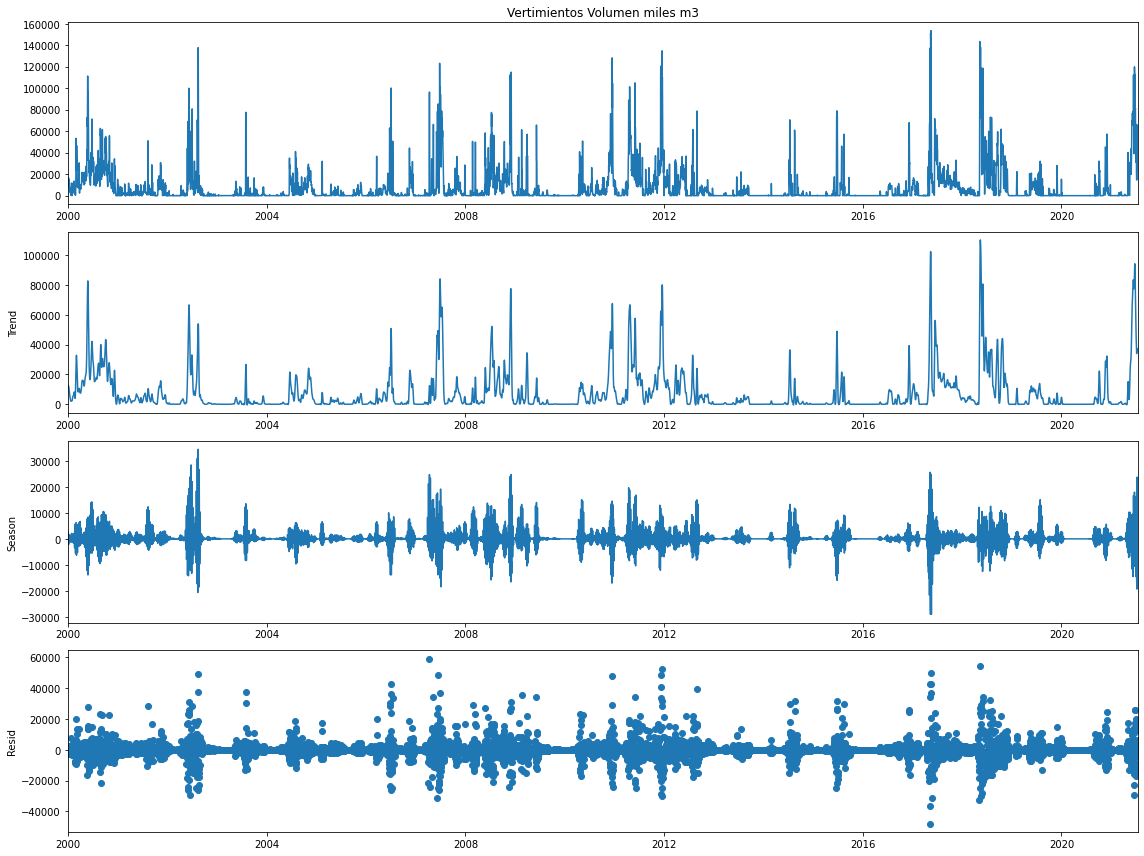

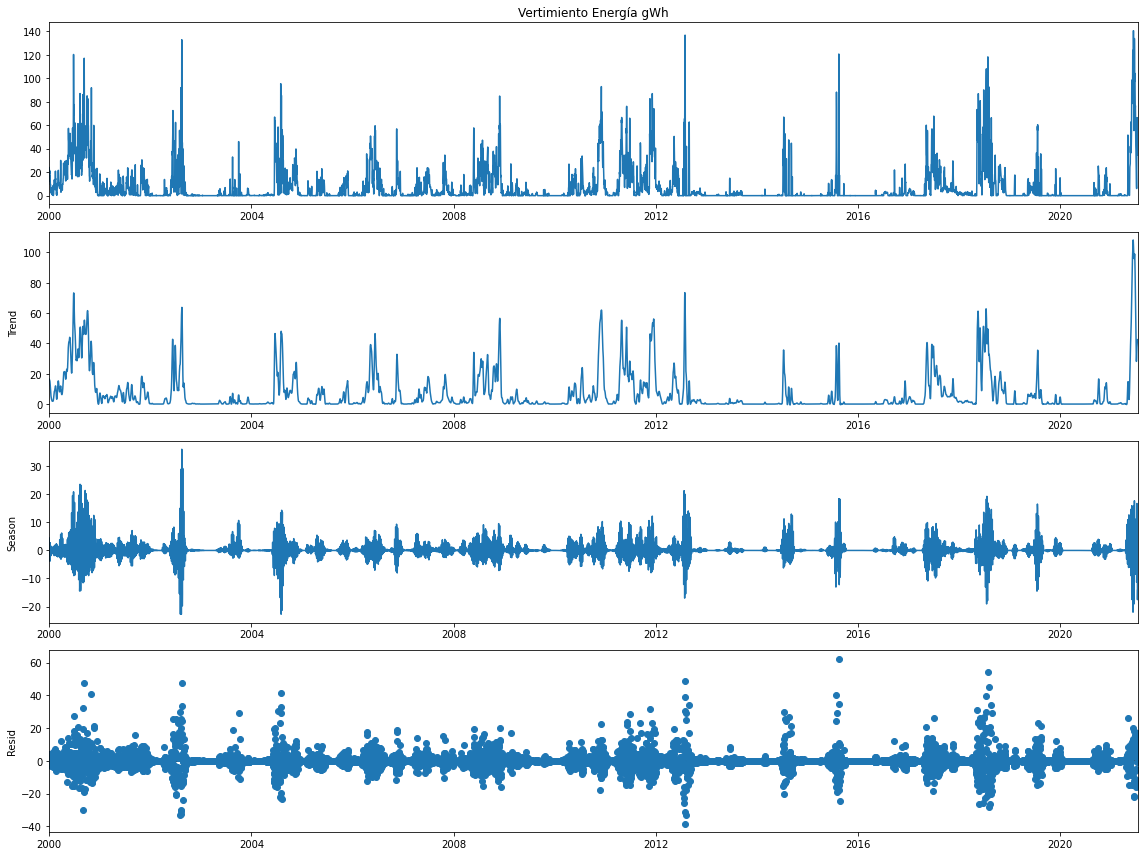

In [ ]:
for i in variables:
  plt.rc('figure',figsize=(16,12))
  plt.rc('font',size=10)
  Y = df[i].fillna(0)
  stl = STL(Y)
  res = stl.fit()
  fig = res.plot()